In [27]:
"""
<Python 문서 전체 설명>
1. 전체 순서
    
2. #: 코드 설명, ##: 대제목, ###: 소제목
    ##과 ###은 마크다운 셀에서 실행, 일반 셀과 구분하기 위해 ***으로 감싸줌
3. 수정하기 쉽도록 문단 간의 띄어쓰기는 최종 파이썬 파일을 정리할 때 할 예정
    파이썬 파일은 코드를 전체적으로 볼 때만 사용
"""

'\n<Python 문서 전체 설명>\n1. 전체 순서\n    \n2. #: 코드 설명, ##: 대제목, ###: 소제목\n    ##과 ###은 마크다운 셀에서 실행, 일반 셀과 구분하기 위해 ***으로 감싸줌\n3. 수정하기 쉽도록 문단 간의 띄어쓰기는 최종 파이썬 파일을 정리할 때 할 예정\n    파이썬 파일은 코드를 전체적으로 볼 때만 사용\n'

## ***1. 데이터셋 준비하기***

In [28]:
# warning 제거
import warnings
warnings.filterwarnings('ignore')
# 필요 라이브러리 가져오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import os

In [29]:
# 데이터 파일 확인
input_path = os.getcwd() + '/used_car copy'  # 데이터셋이 저장된 경로
file_paths = []

for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        if filename.endswith('.csv'):  # CSV 파일만 선택
            file_paths.append(file_path)

print(f"총 {len(file_paths)}개의 CSV 파일을 발견했습니다.")
print(file_paths)

총 9개의 CSV 파일을 발견했습니다.
['c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\audi.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\bmw.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\ford.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\hyundai.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\merc.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\skoda.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\toyota.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\vauxhall.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\vw.csv']


In [30]:
# CSV 파일 읽기 및 병합
data_frames = []

for file_path in file_paths:
    df = pd.read_csv(file_path)
    print(f"{file_path} 파일 읽기 완료. 데이터 크기: {df.shape}")
    df["carMake"] = file_path.split('/')[-1].split('.')[0].split('\\')[1]
    data_frames.append(df)    

c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\audi.csv 파일 읽기 완료. 데이터 크기: (10668, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\bmw.csv 파일 읽기 완료. 데이터 크기: (10781, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\ford.csv 파일 읽기 완료. 데이터 크기: (17965, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\hyundai.csv 파일 읽기 완료. 데이터 크기: (4860, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\merc.csv 파일 읽기 완료. 데이터 크기: (13119, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\skoda.csv 파일 읽기 완료. 데이터 크기: (6267, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\toyota.csv 파일 읽기 완료. 데이터 크기: (6738, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\vauxhall.csv 파일 읽기 완료. 데이터 크기: (13632, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\vw.csv 파일 읽기 완료. 데이터 크기: (15157, 9)


In [31]:
# 모든 데이터프레임을 하나로 병합
if data_frames:
    full_data = pd.concat(data_frames, ignore_index=True)
    print(f"병합된 데이터 크기: {full_data.shape}")
else:
    print("CSV 파일이 없습니다.")    

병합된 데이터 크기: (99187, 11)


In [32]:
# 데이터프레임 확인
print("데이터의 첫 5행 미리보기:")
print(full_data.head())

데이터의 첫 5행 미리보기:
  model  year  price transmission  mileage fuelType    tax   mpg  engineSize  \
0    A1  2017  12500       Manual    15735   Petrol  150.0  55.4         1.4   
1    A6  2016  16500    Automatic    36203   Diesel   20.0  64.2         2.0   
2    A1  2016  11000       Manual    29946   Petrol   30.0  55.4         1.4   
3    A4  2017  16800    Automatic    25952   Diesel  145.0  67.3         2.0   
4    A3  2019  17300       Manual     1998   Petrol  145.0  49.6         1.0   

  carMake  tax(£)  
0    audi     NaN  
1    audi     NaN  
2    audi     NaN  
3    audi     NaN  
4    audi     NaN  


In [33]:
# 데이터셋 원본파일(full_data) 내보내기
# full_data.to_csv('full_data.csv', index=False) # 파일 실행마다 파일 생성을 방지하기 위해 주석 처리

## ***2. 데이터셋 EDA***

In [34]:
# 데이터 컬럼 의미 확인
# model: 모델 구분 / year: 출시 년도 / price: 가격(Pound) / transmission: 변속기 유형(요즘 대부분 오토)
# mileage: 주행 거리 (mile) / fuelType: 연료 유형(Petrol: 휘발유, Disel: 경유) / tax: 연간 도로세 (Pound) 
# / mpg(miles per gallon): 1갤런 당 주행거리(mile) 즉 연비 / engineSize: 엔진 크기(단위:리터)
full_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi,NaN


### ***EDA를 위한 최소한의 전처리***

In [35]:
# 전처리를 위한 복사본 만들기
full2_data = full_data.copy(deep=True)

# 명목형 변수 값의 공백을 삭제
str_list = ['model', 'transmission', 'fuelType', 'carMake'] # 명목변수
for i in str_list:
    full2_data[i] = full2_data[i].str.strip()
print(full2_data['model'].unique()[:20])

['A1' 'A6' 'A4' 'A3' 'Q3' 'Q5' 'A5' 'S4' 'Q2' 'A7' 'TT' 'Q7' 'RS6' 'RS3'
 'A8' 'Q8' 'RS4' 'RS5' 'R8' 'SQ5']


In [36]:
# tax열 결측치 채우기: tax 와 tax(£) 컬럼 합치기
full2_data['tax'].fillna(full2_data['tax(£)'], inplace=True)
full2_data.drop(columns='tax(£)', inplace=True)
full2_data.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
carMake         0
dtype: int64

In [37]:
# 전체 데이터 확인
print('1. 데이터 프레임 요약:')
print(full2_data.info())
print(f'\n2. 결측값 확인: \n{full2_data.isna().sum()}')
print(f'\n3. 기술통계 요약: \n{full2_data.describe()}')

1. 데이터 프레임 요약:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  float64
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   carMake       99187 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 7.6+ MB
None

2. 결측값 확인: 
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
carMake         0
dtype: int64

3. 기술통계 요약: 
               year          price        mileage           tax          

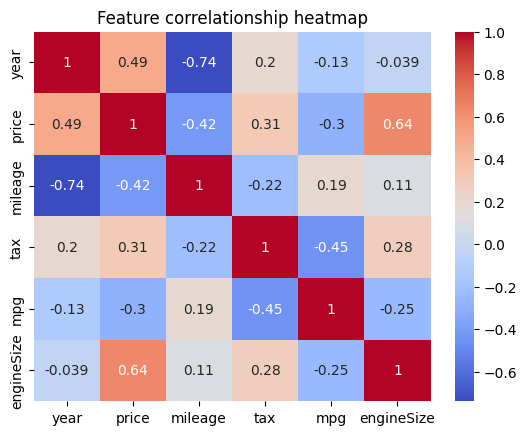

In [38]:
# 데이터 간 상관관계 히트맵 표현
sns.heatmap(data=full2_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature correlationship heatmap')
plt.show()

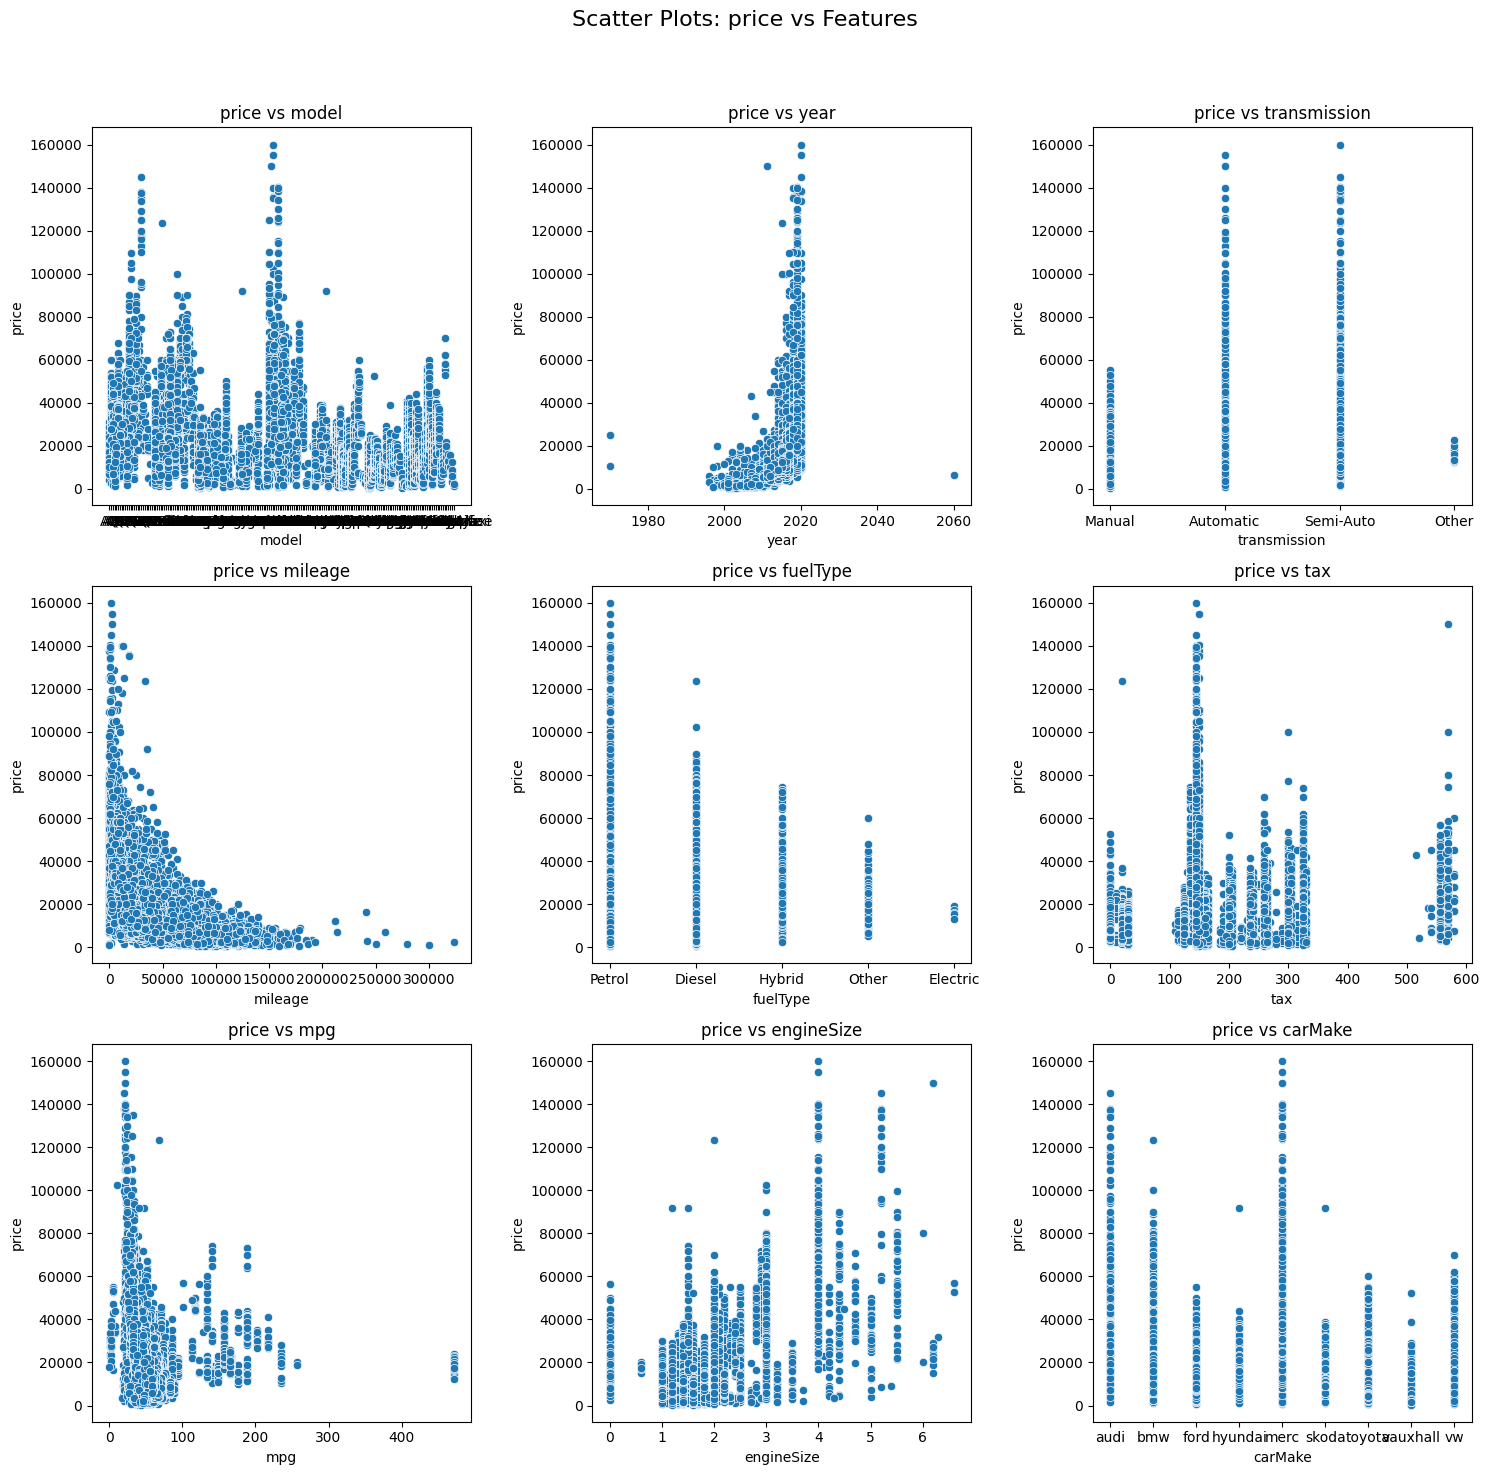

In [39]:
# scatterplot 그리기

# Subplot 설정
num_features = len(full2_data.columns) -1  # 독립 변수 개수
cols = 3  # 한 줄에 들어갈 플롯 수
rows = (num_features + cols - 1) // cols  # 행 개수 계산

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
fig.suptitle("Scatter Plots: price vs Features", fontsize=16)

# 각 독립 변수와 price의 산점도 그리기
for i, column in enumerate(full2_data.columns.drop('price')):
    ax = axes[i // cols, i % cols]
    sns.scatterplot(data=full2_data, x=column, y="price", ax=ax)
    ax.set_title(f"price vs {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("price")

# 빈 subplot 숨기기 (독립변수 개수가 subplot보다 적은 경우)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목과 간격 조정
plt.show()

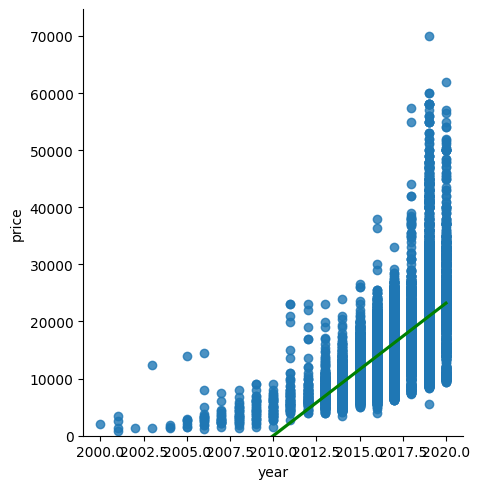

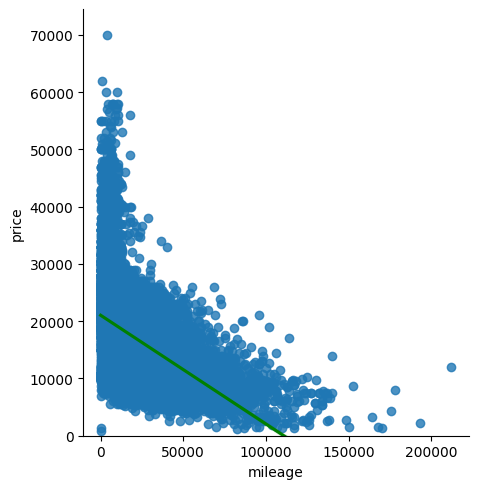

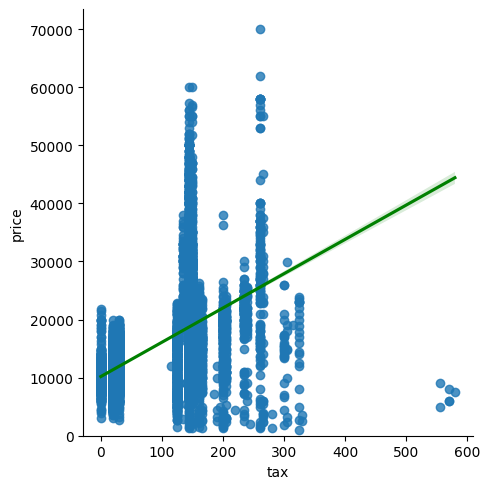

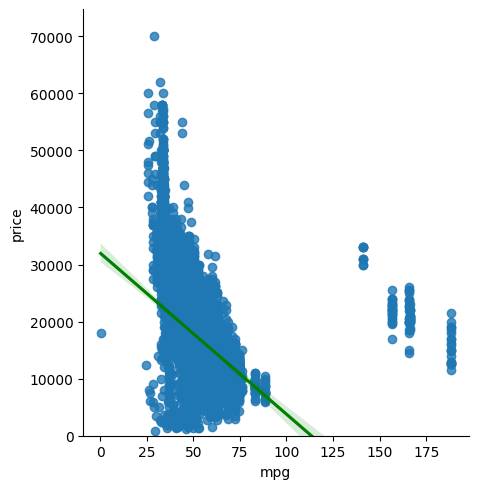

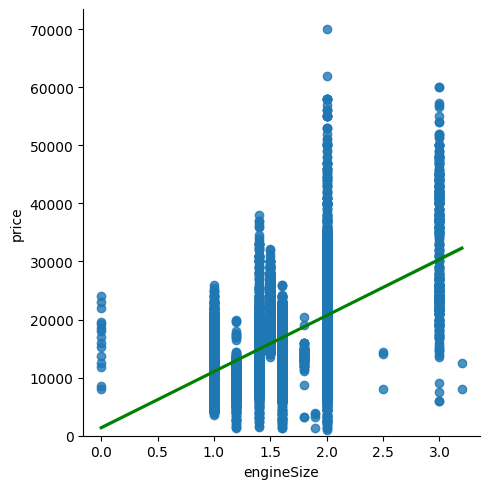

In [40]:
# 가격별 산점도(선형성 확인)
import seaborn as sns
import matplotlib.pyplot as plt
# 이산형 'year'
# 연속형 'price','mileage','tax','tax(£)', 'engineSize'
num_colums = df._get_numeric_data().columns.tolist()
# sns.lmplot(data= df, x='year', y='price',
#     line_kws={'color':'green'}
# )
# plt.ylim(0)
# plt.show()
# sns.lmplot(data= df, x='mileage', y='price',
#     line_kws={'color':'green'}
# )
# plt.ylim(0)
# plt.show()

for i in num_colums:
  if i != 'price':
    sns.lmplot(data= df, x=i, y='price',
        line_kws={'color':'green'}
    )
    plt.ylim(0)
    plt.show()

In [41]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_colums = full2_data._get_numeric_data().columns.tolist()
num_df = full2_data[num_colums].drop(['price'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(num_df.values, i) for i in range(num_df.shape[1])] # NaN 제거 하고 해야함
vif["features"] = num_df.columns
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
print(vif)
if vif['VIF Factor'][0] > 10:
  print("다중공선성 존재")
  print(vif[vif['VIF Factor'] > 10])
else:
  print("다중공선성 존재하지 않음")


   VIF Factor    features
0   38.475812        year
1   16.541283         mpg
2   11.407064  engineSize
3    6.274072         tax
4    2.418142     mileage
다중공선성 존재
   VIF Factor    features
0   38.475812        year
1   16.541283         mpg
2   11.407064  engineSize


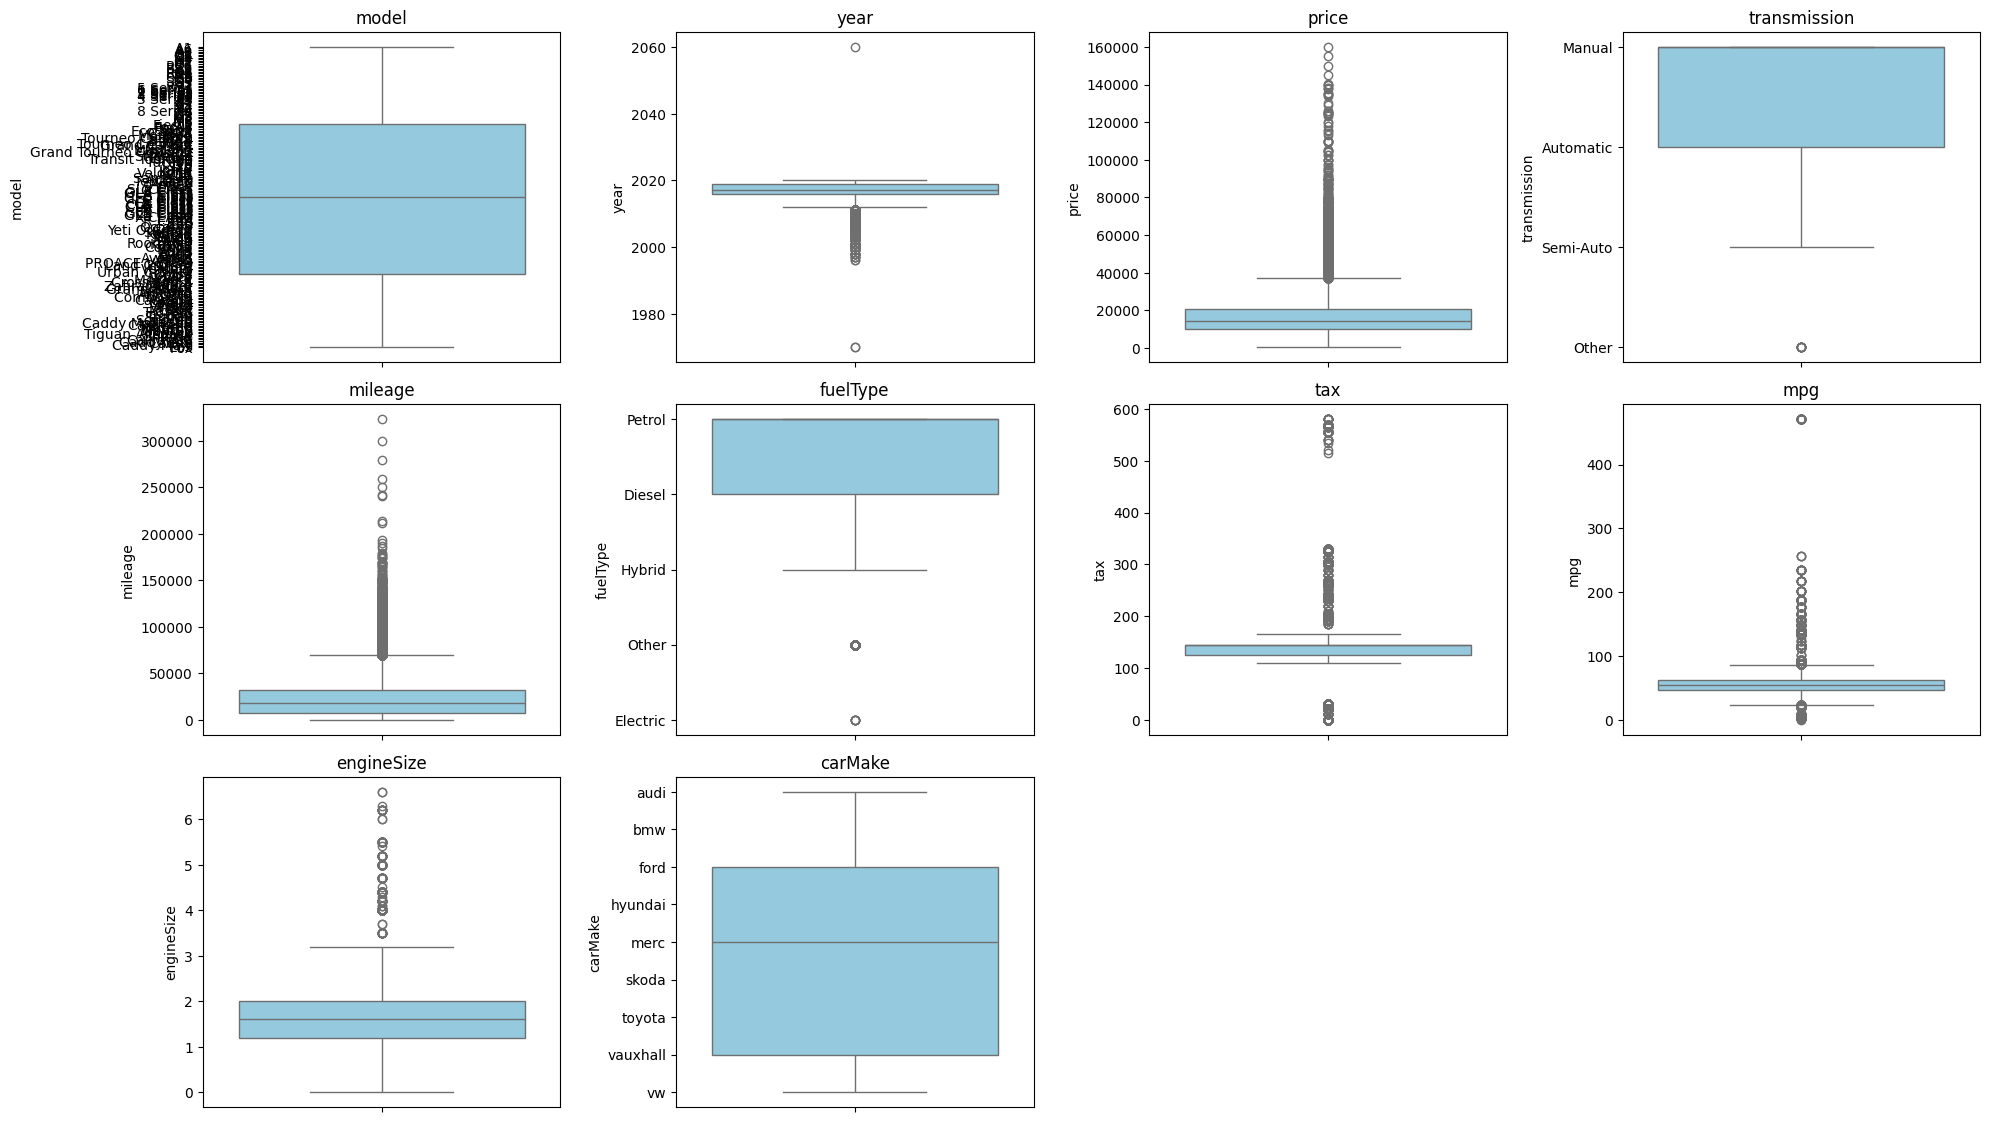

In [42]:
# 수치형 feature에 대해 박스플롯 그리기

plt.figure(figsize=(20, 15))  # 전체 플롯 크기 설정
for i, column in enumerate(full2_data.columns, 1):
    plt.subplot(4, 4, i)  # 4x4 subplot 생성
    sns.boxplot(y=full2_data[column], color="skyblue")
    plt.title(column, fontsize=12)
    plt.tight_layout()  # 플롯 간격 조정

plt.show()

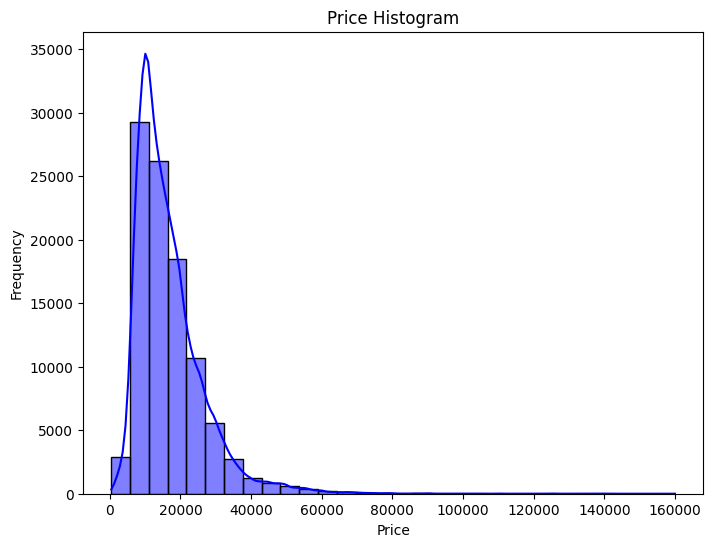

In [43]:
# 가격 분포 시각화: 1,000 ~ 5,000 만원 구간에 대부분 분포함
plt.figure(figsize=(8,6))
sns.histplot(full2_data['price'], kde=True, bins=30, color="blue")
plt.title("Price Histogram")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## ***4. 데이터 전처리***

### ***이상치 제거***

In [44]:
# 모델 별 이상치 확인: 너무 길어서 주석 처리
#unique_model = full2_data['model'].unique()
#count_nums=0
#for i in unique_model:
#    model_year = full2_data[full2_data['model'] == i]['year']
#    if any(x < 2000 for x in model_year):
#        count_nums += 1
#        year_before_2000 = [x for x in model_year if x < 2000]
#        print(f'model name:{i}, count:{len(model_year)}')
#        print(f'2000년 이전 year 수:{len(year_before_2000)}')
#        plt.boxplot(model_year)
#        plt.show()
#    elif any(x > 2020 for x in model_year):
#        count_nums += 1
#        year_after_2020 = [x for x in model_year if x > 2020]
#        print(f'model name:{i}, count:{len(model_year)}')
#        print(f'2000년 이후 year 수:{len(year_before_2000)}')
#        plt.boxplot(model_year)
#        plt.show()
#print(f'count_nums:{count_nums}')

In [45]:
# year별 개수 세기
full2_data_cnt =full2_data.groupby(by='year').agg('count')
full2_data_cnt

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake
year,,,,,,,,,
1970,2,2,2,2,2,2,2,2,2
1996,2,2,2,2,2,2,2,2,2
1997,4,4,4,4,4,4,4,4,4
1998,8,8,8,8,8,8,8,8,8
1999,6,6,6,6,6,6,6,6,6
2000,9,9,9,9,9,9,9,9,9
2001,20,20,20,20,20,20,20,20,20
2002,31,31,31,31,31,31,31,31,31
2003,34,34,34,34,34,34,34,34,34


      model  cumsum  cumsum_ratio
year                             
1970      2       2      0.002016
1996      2       4      0.004033
1997      4       8      0.008066
1998      8      16      0.016131
1999      6      22      0.022180
2000      9      31      0.031254
2001     20      51      0.051418
2002     31      82      0.082672
2003     34     116      0.116951
2004     52     168      0.169377
2005     69     237      0.238943
2006     86     323      0.325648
2007    163     486      0.489984
2008    200     686      0.691623
2009    278     964      0.971902
2010    340    1304      1.314688
2011    432    1736      1.750229
2012    634    2370      2.389426
2013   2603    4973      5.013762
2014   4085    9058      9.132245
2015   7645   16703     16.839908
2016  15850   32553     32.819825
2017  21733   54286     54.730963
2018  13664   67950     68.506962
2019  26771   94721     95.497394
2020   4465   99186     99.998992
2060      1   99187    100.000000


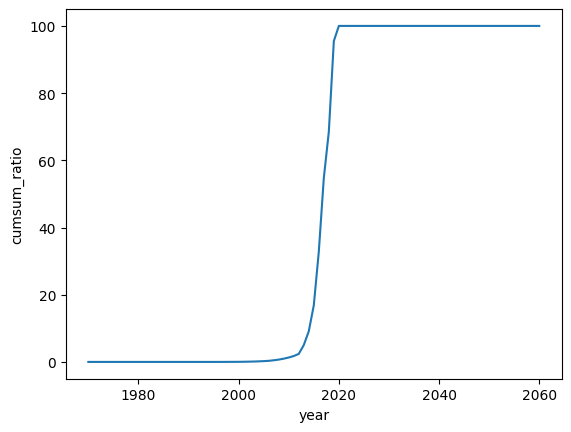

In [46]:
# year의 누적합과, 누적비율을 세기: 2014년~2020년은 데이터의 95%로서 적당한 시기임
full2_data_cnt['cumsum'] =full2_data_cnt['model'].cumsum()
full2_data_cnt['cumsum_ratio'] = full2_data_cnt['cumsum'] / 99187 * 100
print(full2_data_cnt[['model', 'cumsum', 'cumsum_ratio']])
sns.lineplot(data=full2_data_cnt, x='year', y='cumsum_ratio')
plt.show()

In [47]:
# IQR 기준으로 year 이상치 탐지
Q1 = full2_data["year"].quantile(0.25)
Q3 = full2_data["year"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = full2_data[(full2_data["year"] < lower_bound) | (full2_data["year"] > upper_bound)]
print(outliers)

      model  year  price transmission  mileage fuelType    tax   mpg  \
7403     S4  2004   6990    Automatic    88024   Petrol  325.0  22.4   
7404     A3  2009   2490       Manual   152034   Diesel  150.0  55.4   
7414     A3  2009   4495       Manual    92000   Petrol  200.0  40.9   
7415     A5  2010   9495       Manual    76000   Petrol  235.0  38.7   
7416     A3  2009   5995       Manual    82000   Petrol  235.0  39.2   
...     ...   ...    ...          ...      ...      ...    ...   ...   
99181   Eos  2006   2995       Manual    92640   Diesel  200.0  48.0   
99183   Fox  2008   1799       Manual    88102   Petrol  145.0  46.3   
99184   Fox  2009   1590       Manual    70000   Petrol  200.0  42.0   
99185   Fox  2006   1250       Manual    82704   Petrol  150.0  46.3   
99186   Fox  2007   2295       Manual    74000   Petrol  145.0  46.3   

       engineSize carMake  
7403          4.2    audi  
7404          1.9    audi  
7414          1.6    audi  
7415          2.0    au

In [48]:
# year 이상치, 2060년 데이터 1개 삭제
print(full2_data.shape)
cond1 = (full2_data['year'] == 2060)
full2_data = full2_data[~cond1]
print(full2_data.shape)
full2_data.reset_index(drop=True, inplace=True) # 행과 함께 중간의 index 1개가 삭제됨. index를 초기화

(99187, 10)
(99186, 10)


In [49]:
full2_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
99181,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,vw
99182,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,vw
99183,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,vw
99184,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,vw


### ***인코딩***

In [50]:
# 인코딩 전 컬럼 확인
print(full2_data.select_dtypes(exclude=[int, float]).columns) # 수치형 자료가 아닌 열 4개
full2_data.head(3)

Index(['model', 'transmission', 'fuelType', 'carMake'], dtype='object')


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi


In [51]:
# 명목형 변수 별 고유값 개수 확인: 값 많으면 라벨, 적으면 원 핫 인코딩(모델의 학습 속도 고려)
print(full2_data[['model', 'transmission', 'fuelType', 'carMake']].nunique())

model           195
transmission      4
fuelType          5
carMake           9
dtype: int64


In [52]:
# 명목형 변수의 고유값 별 개수 확인1
#vc = full2_data['model'].value_counts()

# 모델의 정확도 향상을 위해 고유값 1개인 데이터 삭제 고려: train / test 데이터 간의 차이가 발생함
#print(f'{vc[vc == 1]} \n\n개수가 1인 모델의 수: {len(vc[vc == 1])}') 
#m_vc_1 = vc[vc == 1].index
#cond = full2_data['model'].isin(m_vc_1)
#
#print(f'\n{full2_data.shape}')
#full2_data = full2_data[~cond]
#print(full2_data.shape)

In [53]:
# 명목형 변수의 고유값 별 개수 확인2
print(full2_data['transmission'].value_counts())
print(full2_data['fuelType'].value_counts())
print(full2_data['carMake'].value_counts())

transmission
Manual       56445
Semi-Auto    22677
Automatic    20055
Other            9
Name: count, dtype: int64
fuelType
Petrol      54927
Diesel      40928
Hybrid       3078
Other         247
Electric        6
Name: count, dtype: int64
carMake
ford        17964
vw          15157
vauxhall    13632
merc        13119
bmw         10781
audi        10668
toyota       6738
skoda        6267
hyundai      4860
Name: count, dtype: int64


In [54]:
# 명목변수 = ['model', 'transmission', 'fuelType', 'carMake']
# 'model' 라벨 인코딩 (추후에 빈도 인코딩으로 변경 가능)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
model_encoded = le.fit_transform(full2_data['model'])
full2_data['model_encoded'] = model_encoded
full2_data.drop(columns='model', inplace=True)
print(full2_data.shape)
full2_data.head()

(99186, 10)


,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,model_encoded
0,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi,13
1,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi,18
2,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi,13
3,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi,16
4,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi,15


In [55]:
# model 외 3개 명목형 변수 원 핫 인코딩: 18개 인코딩 열 생성, 기존 명목형 열 3개 제외 -> 15개 추가 열 생성
from sklearn.preprocessing import OneHotEncoder

str_list = ['transmission', 'fuelType', 'carMake']

for i in str_list:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    values = ohe.fit_transform(full2_data[[i]])
    columns = i + '_' + ohe.categories_[0] # 원래컬럼명 + '_' + 리스트에서 넘파이 배열[0]: 3개 합치기
    df = pd.DataFrame(data=values, columns=columns)
    full2_data = pd.concat([full2_data, df], axis=1)
    full2_data.drop(columns=i, inplace=True)

print(full2_data.shape)
print(full2_data.columns)
full2_data


(99186, 25)
Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_encoded',
       'transmission_Automatic', 'transmission_Manual', 'transmission_Other',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Electric',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol', 'carMake_audi',
       'carMake_bmw', 'carMake_ford', 'carMake_hyundai', 'carMake_merc',
       'carMake_skoda', 'carMake_toyota', 'carMake_vauxhall', 'carMake_vw'],
      dtype='object')


,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,2017,12500,15735,150.0,55.4,1.4,13,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,16500,36203,20.0,64.2,2.0,18,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,11000,29946,30.0,55.4,1.4,13,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,16800,25952,145.0,67.3,2.0,16,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,17300,1998,145.0,49.6,1.0,15,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,2012,5990,74000,125.0,58.9,2.0,61,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99182,2008,1799,88102,145.0,46.3,1.2,66,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99183,2009,1590,70000,200.0,42.0,1.4,66,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99184,2006,1250,82704,150.0,46.3,1.2,66,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## ***4. 데이터셋 분할하기***

In [56]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X = full2_data.drop(columns='price')
y = full2_data['price']

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(69430, 24) (29756, 24)
(69430,) (29756,)


In [57]:
# 표준 스케일링
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler

def sd_scaling(X_train, X_test, y_train, y_test, normalize_columns):
  #종속변수 로그변환, 독립변수 표준화
  # y값 로그변환
  log_y_train = np.log1p(y_train)
  log_y_test = np.log1p(y_test)
  #독립 변수 표준화(standscaler방법)
  standscaler = StandardScaler()
  #train데이터 스케일링
  sd_X_train = X_train.copy()
  sd_X_test = X_test.copy()
  sd_X_train[normalize_columns] = standscaler.fit_transform(X_train[normalize_columns])
  #test데이터 스케일링
  sd_X_test[normalize_columns] = standscaler.transform(X_test[normalize_columns])
  return sd_X_train, sd_X_test, log_y_train, log_y_test

normalize_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
sd_X_train, sd_X_test, log_y_train, log_y_test = sd_scaling(X_train, X_test, y_train, y_test, normalize_columns)
sd_X_train[normalize_columns].std()

year          1.000007
mileage       1.000007
tax           1.000007
mpg           1.000007
engineSize    1.000007
dtype: float64

In [58]:
# 로버스트 스케일링
def robust_scaling(X_train, X_test, y_train, y_test, normalize_columns):
  #종속변수 로그변환, 독립변수 표준 정규화
  # y값 로그변환
  log_y_train = np.log1p(y_train)
  log_y_test = np.log1p(y_test)
  #독립 변수 표준 정규화(RobustScaler방법)
  robust_X_train = X_train.copy()
  robust_X_test = X_test.copy()
  robustScaler = RobustScaler()
  #train데이터 스케일링
  robust_X_train[normalize_columns] = robustScaler.fit_transform(X_train[normalize_columns])
  #test데이터 스케일링
  robust_X_test[normalize_columns] = robustScaler.transform(X_test[normalize_columns])
  return robust_X_train, robust_X_test, log_y_train, log_y_test


normalize_columns = ['year', 'mileage', 'tax', 'mpg']
robust_X_train, robust_X_test, log_y_train, log_y_test = robust_scaling(X_train, X_test, y_train, y_test, normalize_columns)

## ***5. 학습 데이터를 이용한 모델 학습(모델 성능 비교)***

### ***선형 회귀 모델***

In [64]:
# 선형모델 학습
from sklearn.linear_model import LinearRegression
rg = LinearRegression()
rg.fit(X_train, y_train)

LinearRegression()

In [65]:
# 예측  모델 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score

y_train_pred = rg.predict(X_train)
y_test_pred = rg.predict(X_test)
accuarcy = rg.score(X_train, y_train) # 샘플값, 실제값
print(f"학습 정확도: {accuarcy:.3f}")
accuarcy = rg.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred)) # 실제 y값, 예측값
r2 = r2_score(y_test, y_test_pred) #y_true, y_pred
mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"평균 절대 오차(MAE): {mae:.3f}")
print(f"평균 제곱 오차(MSE): {rmse:.3f}")
print(f"평균 절대비율 오차(MAPE): {mape*100:.3f}")
print(f"결정 계수(R2): {r2:.3f}")
print(f"정확도: {accuarcy:.3f}")

학습 정확도: 0.773
평균 절대 오차(MAE): 2945.636
평균 제곱 오차(MSE): 4562.354
평균 절대비율 오차(MAPE): 22.947
결정 계수(R2): 0.779
정확도: 0.779


In [69]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # 예측값, 실제값 데이터 프레임
    result_df = pd.DataFrame(y_test.values, columns=['real_price'])
    result_df['predicted_price']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_price'] - result_df['predicted_price'])

    # 예측값과 실제값의 차이가 큰 순서로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, y_test_pred, n_tops=10)

       real_price  predicted_price      diff
25115      159999          51983.0  108016.0
20546      145000          64211.0   80789.0
21978      137995          64391.0   73604.0
14208      135000          61828.0   73172.0
23360       99950          33798.0   66152.0
1168       102502          39603.0   62899.0
10891      109995          51030.0   58965.0
2609       119450          62208.0   57242.0
15713      100124          45868.0   54256.0
5473       116000          62208.0   53792.0


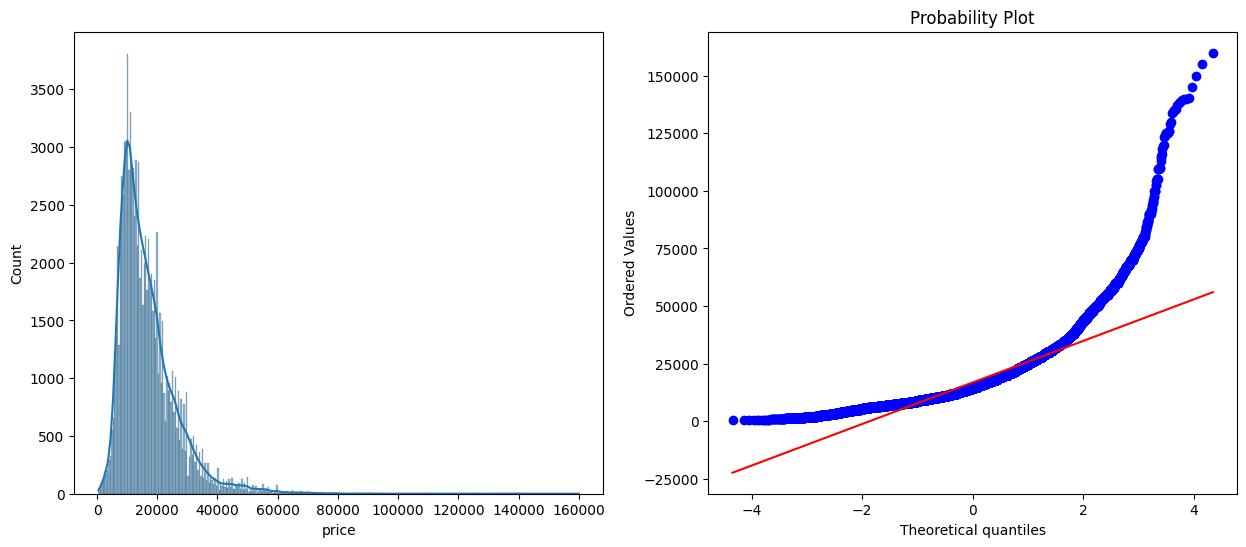

In [70]:
# price값 정규성 확인
from scipy import stats

fig, axs = plt.subplots(1,2, figsize = (15,6))

sns.histplot(full2_data["price"], ax =axs[0], kde=True)
stats.probplot(full2_data["price"], dist='norm', fit=True, plot=axs[1]) # QQplot

plt.show()

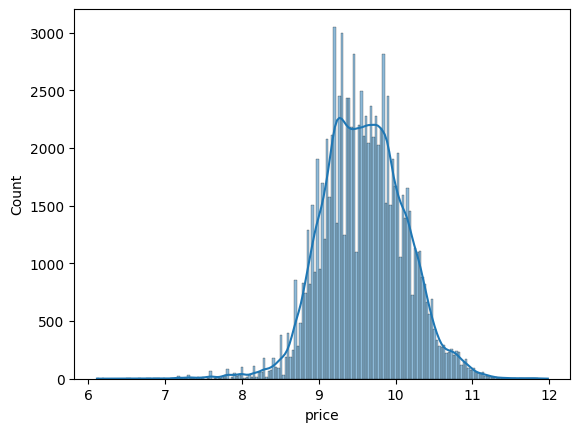

In [ ]:
# price 로그 변환 후 분포 확인: 9.5를 중심으로 정규분포
sns.histplot(np.log1p(full2_data["price"]), kde=True)
plt.show()

In [71]:
# 로그변환 한 데이터셋을 선형모델에 학습
from sklearn.linear_model import LinearRegression
lr_log = LinearRegression()
lr_log.fit(X_train, log_y_train)

LinearRegression()

In [77]:
# 예측  모델 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score
y_pred_test = np.expm1(lr_log.predict(X_test))

# 학습 정확도 측정
accuarcy = lr_log.score(X_train, log_y_train)
print(f'학습 정확도: {accuarcy:.4f}')

# 모델 평가
print('lr_log 평가 지표')
print(f'MAE: {mean_absolute_error(y_test, y_pred_test):.4f}') # 평균 절대 오차
print(f'MSE: {mean_squared_error(y_test, y_pred_test):.4f}') # 평균 제곱 오차
print(f'RMSE: {root_mean_squared_error(y_test, y_pred_test):.4f}') # MSE의 제곱근
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_test) * 100:.2f}') # 실제 값에 비해 차이가 어느 정도인지 퍼센트로 나타냄
print(f'R2_score: {r2_score(y_test, y_pred_test):.4f}') # 실제값의 분산 대비 예측값의 분산

학습 정확도: 0.8803
lr_log 평가 지표
MAE: 2299.3948
MSE: 13318866.5021
RMSE: 3649.5022
MAPE: 14.06
R2_score: 0.8589


### ***XGBOOST 모델***

In [ ]:
#XGBRegressor
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(X_train, y_train)

# 예측  모델 평가
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
accuarcy = xgb.score(X_train, y_train) # 샘플값, 실제값
print(f"학습 정확도: {accuarcy:.3f}")
accuarcy = xgb.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred) # 실제 y값, 예측값
r2 = r2_score(y_test, y_test_pred) #y_true, y_pred
mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"평균 제곱 오차(MSE): {mse:.3f}")
print(f"평균 절대비율 오차(MAPE): {mape:.3f}")
print(f"결정 계수(R2): {r2:.3f}")
print(f"정확도: {accuarcy:.3f}")

학습 정확도: 0.974
평균 제곱 오차(MSE): 4585837.000
평균 절대비율 오차(MAPE): 0.077
결정 계수(R2): 0.954
정확도: 0.954


### ***LightGBM 모델***

In [1]:
! pip install lightgbm


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from lightgbm import LGBMRegressor

#### 결과 출력 함수

In [ ]:
# 스케일링별 결과 출력

def traintest(x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    print(X_train.shape, X_test.shape)
    print(y_train.shape, y_test.shape)

    return (X_train, X_test, y_train, y_test)

In [ ]:
def lgbm_log(x1, x2, y1, y2):
    
    X_train = x1
    X_test = x2
    y_train = y1
    y_test = y2
    
    # LGBMRegressor 모델 선언 후 Fitting
    lgb_model = LGBMRegressor() # all hyper-parameter : default
    lgb_model.fit(X_train, y_train)
    
    # Fitting된 모델로 x_valid를 통해 예측을 진행
    y_pred = lgb_model.predict(X_test)
    
    return (y_pred)

In [ ]:
results_regression3 = {}

def results_model(x1, x2, y1, y2, z):
    
    X_train = x1
    X_test = x2
    y_train = y1
    y_test = y2
    
    lgb_model = LGBMRegressor()
    lgb_model.fit(X_train, y_train)
    
    y_pred = lgb_model.predict(X_test)

    mse = round(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)), 3)
    rmse = round(np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred))), 3)

    mae = round(mean_absolute_error(np.expm1(y_test), np.expm1(y_pred)), 3)
    mape = round(mean_absolute_percentage_error(np.expm1(y_test), np.expm1(y_pred))*100, 3)

    r2 = round(r2_score(y_test, y_pred), 3)

    # 결과 출력
    print(f"\nLGBM {z} Results\n")
    print(f"평균 제곱 오차(MSE): {mse}")
    print(f"평균 제곱근 오차(RMSE): {rmse}" )
    print(f"평균 절대 오차(MAE): {mae}")
    print(f"평균 절대비율 오차(MAPE): {mape}%")
    print(f"결정 계수(R2): {r2}")
    
    # 결과 저장
    results_regression3[f"LightGBM {z} Regression"] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "MAPE":mape, "R2": r2}
    

In [ ]:
results_regression2 = {}

def lgbm_model(x1, x2, y1, y2, z):
    
    X_train = x1
    X_test = x2
    y_train = y1
    y_test = y2
    
    # LGBMRegressor 모델 선언 후 Fitting
    lgb_model = LGBMRegressor() # all hyper-parameter : default
    lgb_model.fit(X_train, y_train)
    
    # Fitting된 모델로 x_valid를 통해 예측을 진행
    y_pred = lgb_model.predict(X_test)

    mse = round(mean_squared_error(y_test, y_pred), 3)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

    mae = round(mean_absolute_error(y_test, y_pred), 3)
    mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 3)

    r2 = round(r2_score(y_test, y_pred), 3)

    # 결과 출력
    print(f"\nLGBM {z} Results\n")
    print(f"평균 제곱 오차(MSE): {mse}")
    print(f"평균 제곱근 오차(RMSE): {rmse}" )
    print(f"평균 절대 오차(MAE): {mae}")
    print(f"평균 절대비율 오차(MAPE): {mape}%")
    print(f"결정 계수(R2): {r2}")
    
    # 결과 저장
    results_regression2[f"LightGBM {z} Regression"] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "MAPE":mape, "R2": r2}

In [ ]:
def lgbm_model_log(x1, x2, y1, y2, z):
    
    X_train = x1
    X_test = x2
    y_train = y1
    y_test = y2
    
    lgb_model = LGBMRegressor()
    lgb_model.fit(X_train, y_train)
    
    y_pred = lgb_model.predict(X_test)

    mse = round(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)), 3)
    rmse = round(np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred))), 3)

    mae = round(mean_absolute_error(np.expm1(y_test), np.expm1(y_pred)), 3)
    mape = round(mean_absolute_percentage_error(np.expm1(y_test), np.expm1(y_pred))*100, 3)

    r2 = round(r2_score(y_test, y_pred), 3)

    # 결과 출력
    print(f"\nLGBM {z} Results\n")
    print(f"평균 제곱 오차(MSE): {mse}")
    print(f"평균 제곱근 오차(RMSE): {rmse}" )
    print(f"평균 절대 오차(MAE): {mae}")
    print(f"평균 절대비율 오차(MAPE): {mape}%")
    print(f"결정 계수(R2): {r2}")
    
    # 결과 저장
    results_regression2[f"LightGBM {z} Regression"] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "MAPE":mape, "R2": r2}

#### 베이스 모델

In [ ]:
# 라벨 인코딩
encoding_df = full2_data.copy(deep=True)

LE = LabelEncoder()
encoding_df['model'] = LE.fit_transform(encoding_df['model'])

# 원 핫 인코딩
encoding_df = pd.get_dummies(encoding_df)
print(len(encoding_df.columns))
encoding_df

25


,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,2017,10550,25250,150.0,54.3,1.4,False,True,False,...,True,False,False,False,False,False,True,False,False,False
1,53,2018,8200,1264,145.0,67.3,1.0,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,116,2019,15650,6825,145.0,67.3,2.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,188,2015,14000,28431,165.0,51.4,2.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,154,2019,18350,10912,150.0,40.9,1.5,False,True,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,64,2016,7999,31348,125.0,54.3,1.2,False,True,False,...,True,False,False,True,False,False,False,False,False,False
99182,34,2017,8999,16700,150.0,47.1,1.4,False,True,False,...,True,False,False,True,False,False,False,False,False,False
99183,34,2014,7499,40700,30.0,57.7,1.0,False,True,False,...,True,False,False,True,False,False,False,False,False,False
99184,65,2015,9999,7010,20.0,67.3,1.6,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
# 데이터셋 준비(X,y)
x_base = encoding_df.drop(columns='price')
y_base = encoding_df['price']

In [ ]:
xtr_lgb, xt_lgb, ytr_lgb, yt_lgb = traintest(x_base, y_base)
lgbm_model(xtr_lgb, xt_lgb, ytr_lgb, yt_lgb, "Base")

(69430, 24) (29756, 24)
(69430,) (29756,)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 16801.196169

LGBM Base Results

평균 제곱 오차(MSE): 5884412.541
평균 제곱근 오차(RMSE): 2425.781
평균 절대 오차(MAE): 1453.819
평균 절대비율 오차(MAPE): 9.303%
결정 계수(R2): 0.941
정확도: 0.941


#### 로그 변환

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = full2_data.select_dtypes(include=numerics)
print(num_df.head(3))

   year  price  mileage    tax   mpg  engineSize
0  2017  10550    25250  150.0  54.3         1.4
1  2018   8200     1264  145.0  67.3         1.0
2  2019  15650     6825  145.0  67.3         2.0


##### 로그 변환용 인코딩

In [ ]:
# 라벨 인코딩
log_df = full2_data.copy(deep=True)

LE = LabelEncoder()
log_df['model'] = LE.fit_transform(log_df['model'])

# 원 핫 인코딩
log_df = pd.get_dummies(log_df, dtype=int)
print(len(log_df.columns))
log_df

25


,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,2017,10550,25250,150.0,54.3,1.4,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,53,2018,8200,1264,145.0,67.3,1.0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,116,2019,15650,6825,145.0,67.3,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,188,2015,14000,28431,165.0,51.4,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,154,2019,18350,10912,150.0,40.9,1.5,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,64,2016,7999,31348,125.0,54.3,1.2,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99182,34,2017,8999,16700,150.0,47.1,1.4,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99183,34,2014,7499,40700,30.0,57.7,1.0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99184,65,2015,9999,7010,20.0,67.3,1.6,0,1,0,...,0,0,0,1,0,0,0,0,0,0


##### price 컬럼 변환

In [ ]:
log_df['price'] = np.log1p(log_df['price'])
log_df

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,2017,9.263976,25250,150.0,54.3,1.4,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,53,2018,9.012011,1264,145.0,67.3,1.0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,116,2019,9.658290,6825,145.0,67.3,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,188,2015,9.546884,28431,165.0,51.4,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,154,2019,9.817439,10912,150.0,40.9,1.5,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,64,2016,8.987197,31348,125.0,54.3,1.2,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99182,34,2017,9.104980,16700,150.0,47.1,1.4,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99183,34,2014,8.922658,40700,30.0,57.7,1.0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99184,65,2015,9.210340,7010,20.0,67.3,1.6,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# 데이터셋 준비(X,y)
X_logp = log_df.drop(columns='price')
y_logp = log_df['price']

In [ ]:
xtr_logp, xt_logp, ytr_logp, yt_logp = traintest(X_logp, y_logp)
lgbm_model_log(xtr_logp, xt_logp, ytr_logp, yt_logp, "Log_Price")

(69430, 24) (29756, 24)
(69430,) (29756,)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 9.586980

LGBM Log_Price Results

평균 제곱 오차(MSE): 0.014
평균 제곱근 오차(RMSE): 0.119
평균 절대 오차(MAE): 0.086
평균 절대비율 오차(MAPE): 0.906%
결정 계수(R2): 0.951
정확도: 0.951


In [ ]:
results_model(xtr_logp, xt_logp, ytr_logp, yt_logp, "Log_Price")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 9.586980

LGBM Log_Price Results

평균 제곱 오차(MSE): 6936923.007
평균 제곱근 오차(RMSE): 2633.804
평균 절대 오차(MAE): 1448.714
평균 절대비율 오차(MAPE): 8.645%
정확도: 0.951


##### price & 연속형 컬럼 변환

In [ ]:
log_df.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,2017,9.263976,25250,150.0,54.3,1.4,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,53,2018,9.012011,1264,145.0,67.3,1.0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,116,2019,9.658290,6825,145.0,67.3,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,188,2015,9.546884,28431,165.0,51.4,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,154,2019,9.817439,10912,150.0,40.9,1.5,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
log_df[['mileage', 'tax', 'mpg', 'engineSize']] = np.log1p(log_df[['mileage', 'tax', 'mpg', 'engineSize']])
log_df

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,2017,9.263976,10.136621,5.017280,4.012773,0.875469,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,53,2018,9.012011,7.142827,4.983607,4.223910,0.693147,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,116,2019,9.658290,8.828494,4.983607,4.223910,1.098612,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,188,2015,9.546884,10.255271,5.111988,3.958907,1.098612,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,154,2019,9.817439,9.297710,5.017280,3.735286,0.916291,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,64,2016,8.987197,10.352938,4.836282,4.012773,0.788457,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99182,34,2017,9.104980,9.723224,5.017280,3.873282,0.875469,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99183,34,2014,8.922658,10.614008,3.433987,4.072440,0.693147,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99184,65,2015,9.210340,8.855236,3.044522,4.223910,0.955511,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# 데이터셋 준비(X,y)
X_logpn = log_df.drop(columns='price')
y_logpn = log_df['price']

In [ ]:
xtr_logpn, xt_logpn, ytr_logpn, yt_logpn = traintest(X_logpn, y_logpn)
lgbm_model_log(xtr_logpn, xt_logpn, ytr_logpn, yt_logpn, "Log_Price_Nums")

(69430, 24) (29756, 24)
(69430,) (29756,)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 9.586980

LGBM Log_Price_Nums Results

평균 제곱 오차(MSE): 0.014
평균 제곱근 오차(RMSE): 0.119
평균 절대 오차(MAE): 0.086
평균 절대비율 오차(MAPE): 0.906%
결정 계수(R2): 0.951
정확도: 0.951


In [ ]:
results_model(xtr_logpn, xt_logpn, ytr_logpn, yt_logpn, "Log_Price_Nums")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 9.586980

LGBM Log_Price_Nums Results

평균 제곱 오차(MSE): 6936919.504
평균 제곱근 오차(RMSE): 2633.803
평균 절대 오차(MAE): 1448.714
평균 절대비율 오차(MAPE): 8.645%
정확도: 0.951


##### price & 연속형 & 이산형 컬럼 변환

In [ ]:
log_df['year'] = np.log1p(log_df['year'])
log_df

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,7.609862,9.263976,10.136621,5.017280,4.012773,0.875469,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,53,7.610358,9.012011,7.142827,4.983607,4.223910,0.693147,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,116,7.610853,9.658290,8.828494,4.983607,4.223910,1.098612,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,188,7.608871,9.546884,10.255271,5.111988,3.958907,1.098612,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,154,7.610853,9.817439,9.297710,5.017280,3.735286,0.916291,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,64,7.609367,8.987197,10.352938,4.836282,4.012773,0.788457,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99182,34,7.609862,9.104980,9.723224,5.017280,3.873282,0.875469,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99183,34,7.608374,8.922658,10.614008,3.433987,4.072440,0.693147,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99184,65,7.608871,9.210340,8.855236,3.044522,4.223910,0.955511,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# 데이터셋 준비(X,y)
X_logpa = log_df.drop(columns='price')
y_logpa = log_df['price']

In [ ]:
xtr_logpa, xt_logpa, ytr_logpa, yt_logpa = traintest(X_logpa, y_logpa)
lgbm_model_log(xtr_logpa, xt_logpa, ytr_logpa, yt_logpa, "Log_Price_All")

(69430, 24) (29756, 24)
(69430,) (29756,)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 9.586980

LGBM Log_Price_All Results

평균 제곱 오차(MSE): 0.014
평균 제곱근 오차(RMSE): 0.119
평균 절대 오차(MAE): 0.086
평균 절대비율 오차(MAPE): 0.906%
결정 계수(R2): 0.951
정확도: 0.951


In [ ]:
results_model(xtr_logpa, xt_logpa, ytr_logpa, yt_logpa, "Log_Price_All")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 9.586980

LGBM Log_Price_All Results

평균 제곱 오차(MSE): 6936919.504
평균 제곱근 오차(RMSE): 2633.803
평균 절대 오차(MAE): 1448.714
평균 절대비율 오차(MAPE): 8.645%
정확도: 0.951


##### 로그 변환 변수 분포도

In [ ]:
log_num_df = log_df.loc[:, ['year', 'price','mileage', 'tax', 'mpg', 'engineSize']]

print(log_num_df.head())

       year     price    mileage       tax       mpg  engineSize
0  7.609862  9.263976  10.136621  5.017280  4.012773    0.875469
1  7.610358  9.012011   7.142827  4.983607  4.223910    0.693147
2  7.610853  9.658290   8.828494  4.983607  4.223910    1.098612
3  7.608871  9.546884  10.255271  5.111988  3.958907    1.098612
4  7.610853  9.817439   9.297710  5.017280  3.735286    0.916291


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24412\835705054.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, fit=norm)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24412\835705054.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, fit=norm)
C:\Users\Public\Do

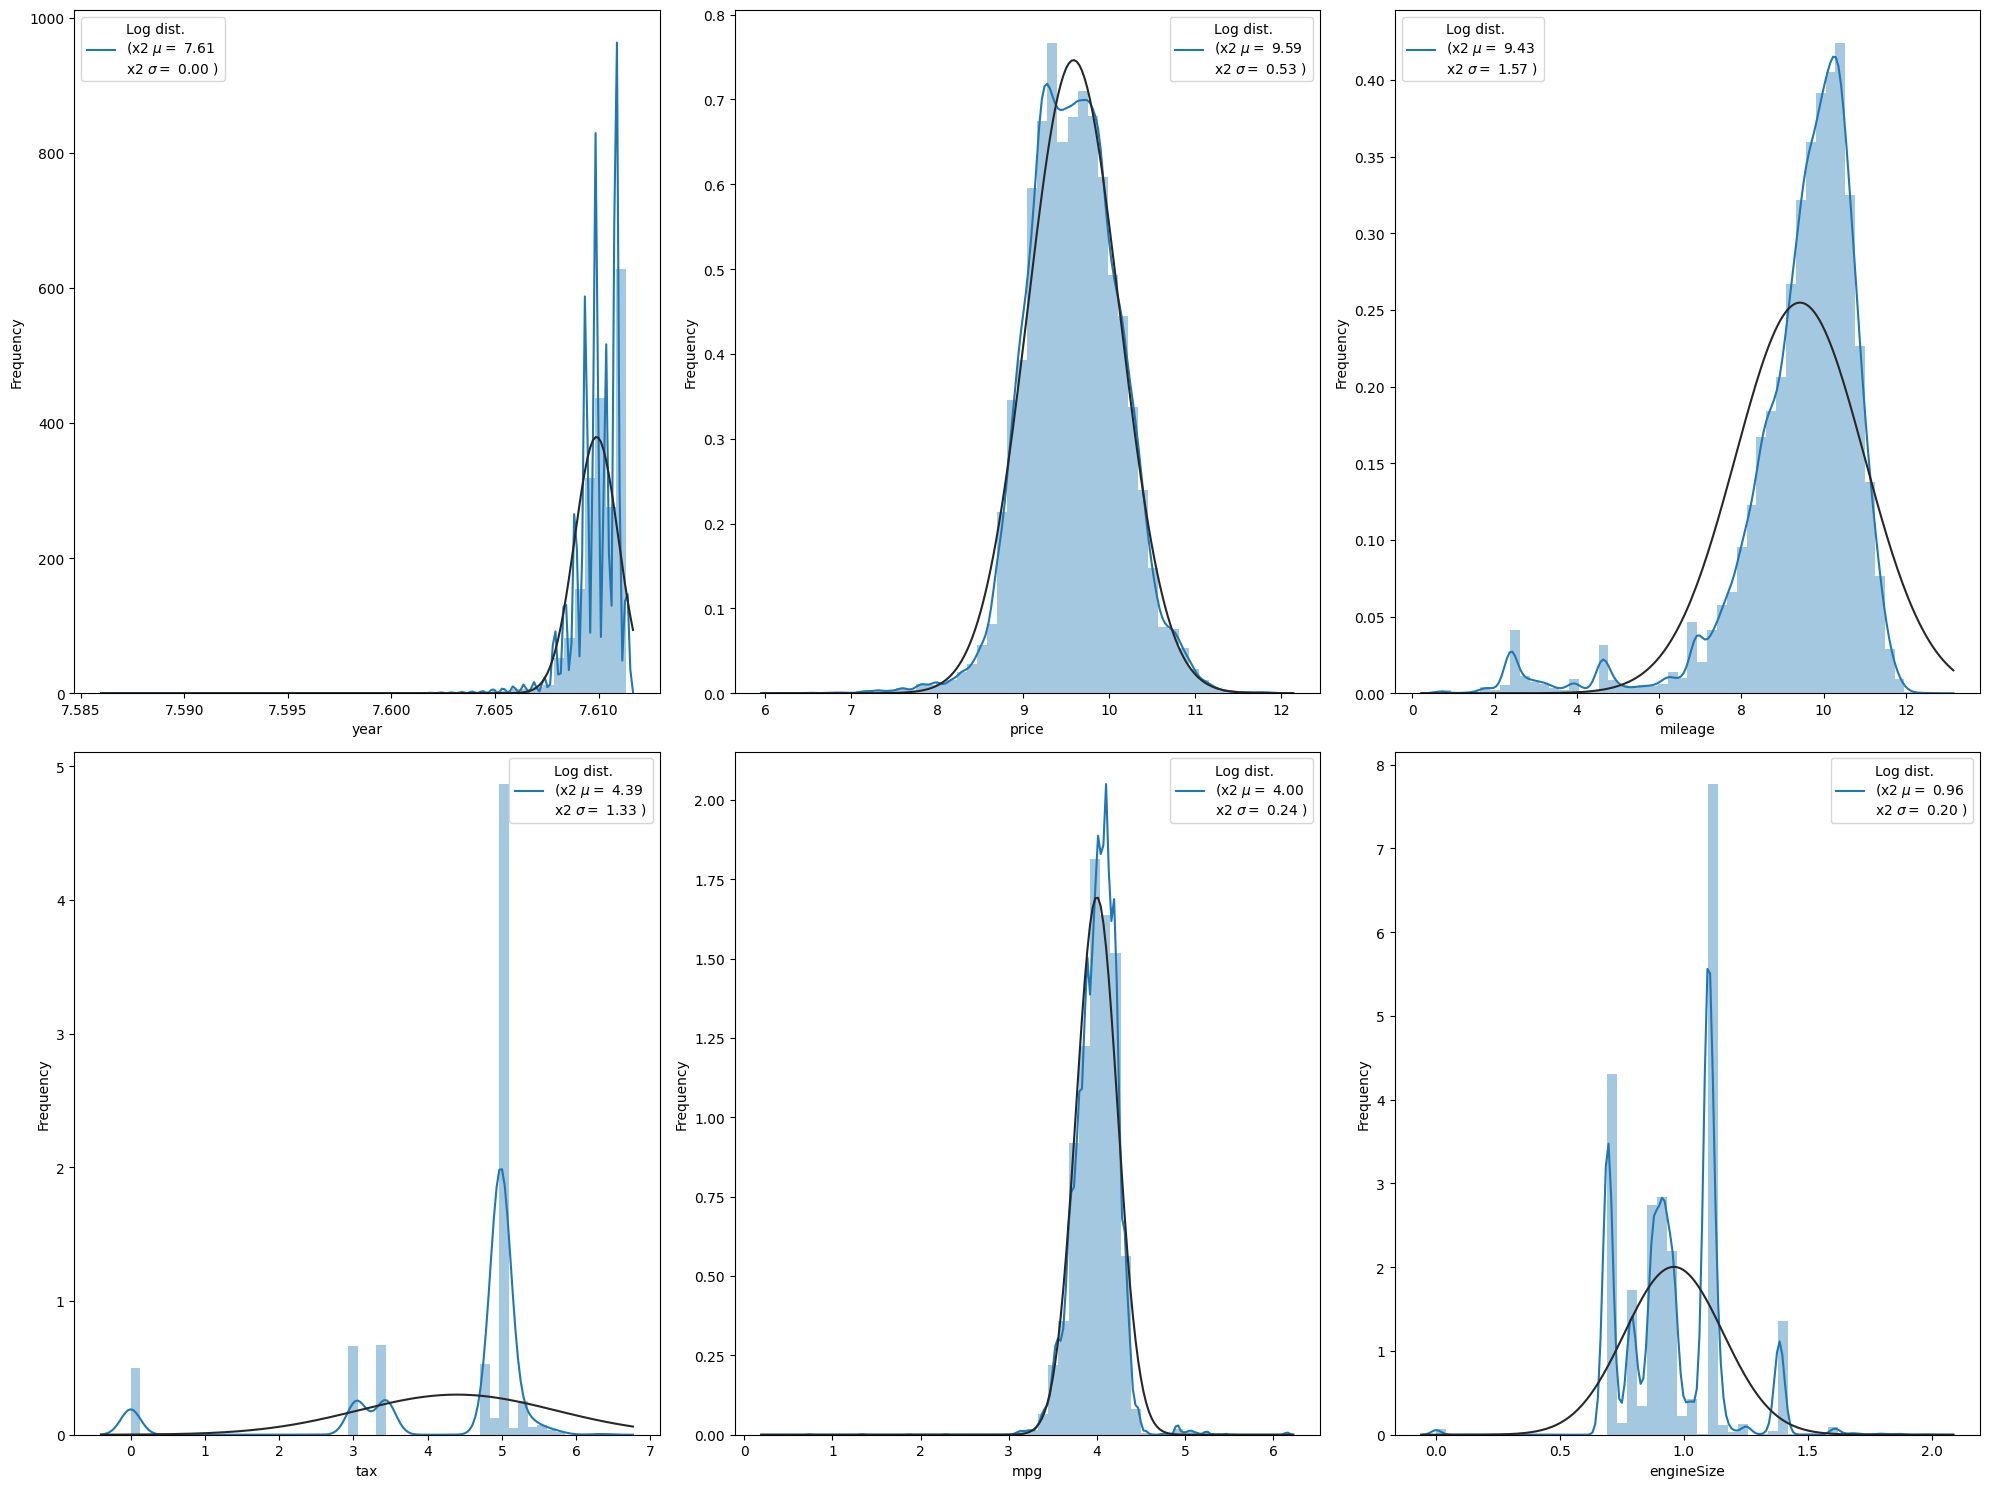

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

figure = plt.figure(figsize=(20,15))
rows, cols = 2, 3
        
for i in range(1, 7): 
    ax = figure.add_subplot(rows, cols, i)
    
    if i <= len(log_num_df):
        log_column = log_num_df.columns[i-1]
        x2 = log_num_df[log_column]
            
        sns.distplot(x2, fit=norm)
        (x2_mu, x2_sigma) = norm.fit(x2)
        
        ax.legend([f'Log dist.\n(x2 $\mu=$ {x2_mu:.2f}\nx2 $\sigma=$ {x2_sigma:.2f} )'], loc='best')
        
        plt.xlabel(f'{log_column}')
        plt.ylabel('Frequency')

    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

##### 독립변수만 로그 변환

In [ ]:
log2_df = encoding_df.copy(deep=True)
log2_df.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,2017,10550,25250,150.0,54.3,1.4,False,True,False,...,True,False,False,False,False,False,True,False,False,False
1,53,2018,8200,1264,145.0,67.3,1.0,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,116,2019,15650,6825,145.0,67.3,2.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,188,2015,14000,28431,165.0,51.4,2.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,154,2019,18350,10912,150.0,40.9,1.5,False,True,False,...,True,False,False,False,False,False,True,False,False,False


In [ ]:
log2_df[['year', 'mileage', 'tax', 'mpg', 'engineSize']] = np.log1p(log2_df[['year', 'mileage', 'tax', 'mpg', 'engineSize']])
log2_df.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,7.609862,10550,10.136621,5.017280,4.012773,0.875469,False,True,False,...,True,False,False,False,False,False,True,False,False,False
1,53,7.610358,8200,7.142827,4.983607,4.223910,0.693147,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,116,7.610853,15650,8.828494,4.983607,4.223910,1.098612,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,188,7.608871,14000,10.255271,5.111988,3.958907,1.098612,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,154,7.610853,18350,9.297710,5.017280,3.735286,0.916291,False,True,False,...,True,False,False,False,False,False,True,False,False,False


In [ ]:
# 데이터셋 준비(X,y)
X_loga = log2_df.drop(columns='price')
y_loga = log2_df['price']

In [ ]:
xtr_loga, xt_loga, ytr_loga, yt_loga = traintest(X_loga, y_loga)
lgbm_model_log(xtr_loga, xt_loga, ytr_loga, yt_loga, "Log_All")

(69430, 24) (29756, 24)
(69430,) (29756,)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 16801.196169

LGBM Log_All Results

평균 제곱 오차(MSE): 5884412.738
평균 제곱근 오차(RMSE): 2425.781
평균 절대 오차(MAE): 1453.821
평균 절대비율 오차(MAPE): 9.303%
결정 계수(R2): 0.941
정확도: 0.941


In [ ]:
results_model(xtr_loga, xt_loga, ytr_loga, yt_loga, "Log_Price_All")

In [ ]:
log2_num_df = log2_df.loc[:, ['year','mileage', 'tax', 'mpg', 'engineSize']]

print(log2_num_df.head())

       year    mileage       tax       mpg  engineSize
0  7.609862  10.136621  5.017280  4.012773    0.875469
1  7.610358   7.142827  4.983607  4.223910    0.693147
2  7.610853   8.828494  4.983607  4.223910    1.098612
3  7.608871  10.255271  5.111988  3.958907    1.098612
4  7.610853   9.297710  5.017280  3.735286    0.916291


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24412\4179438480.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, fit=norm)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24412\4179438480.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, fit=norm)
C:\Users\Public\

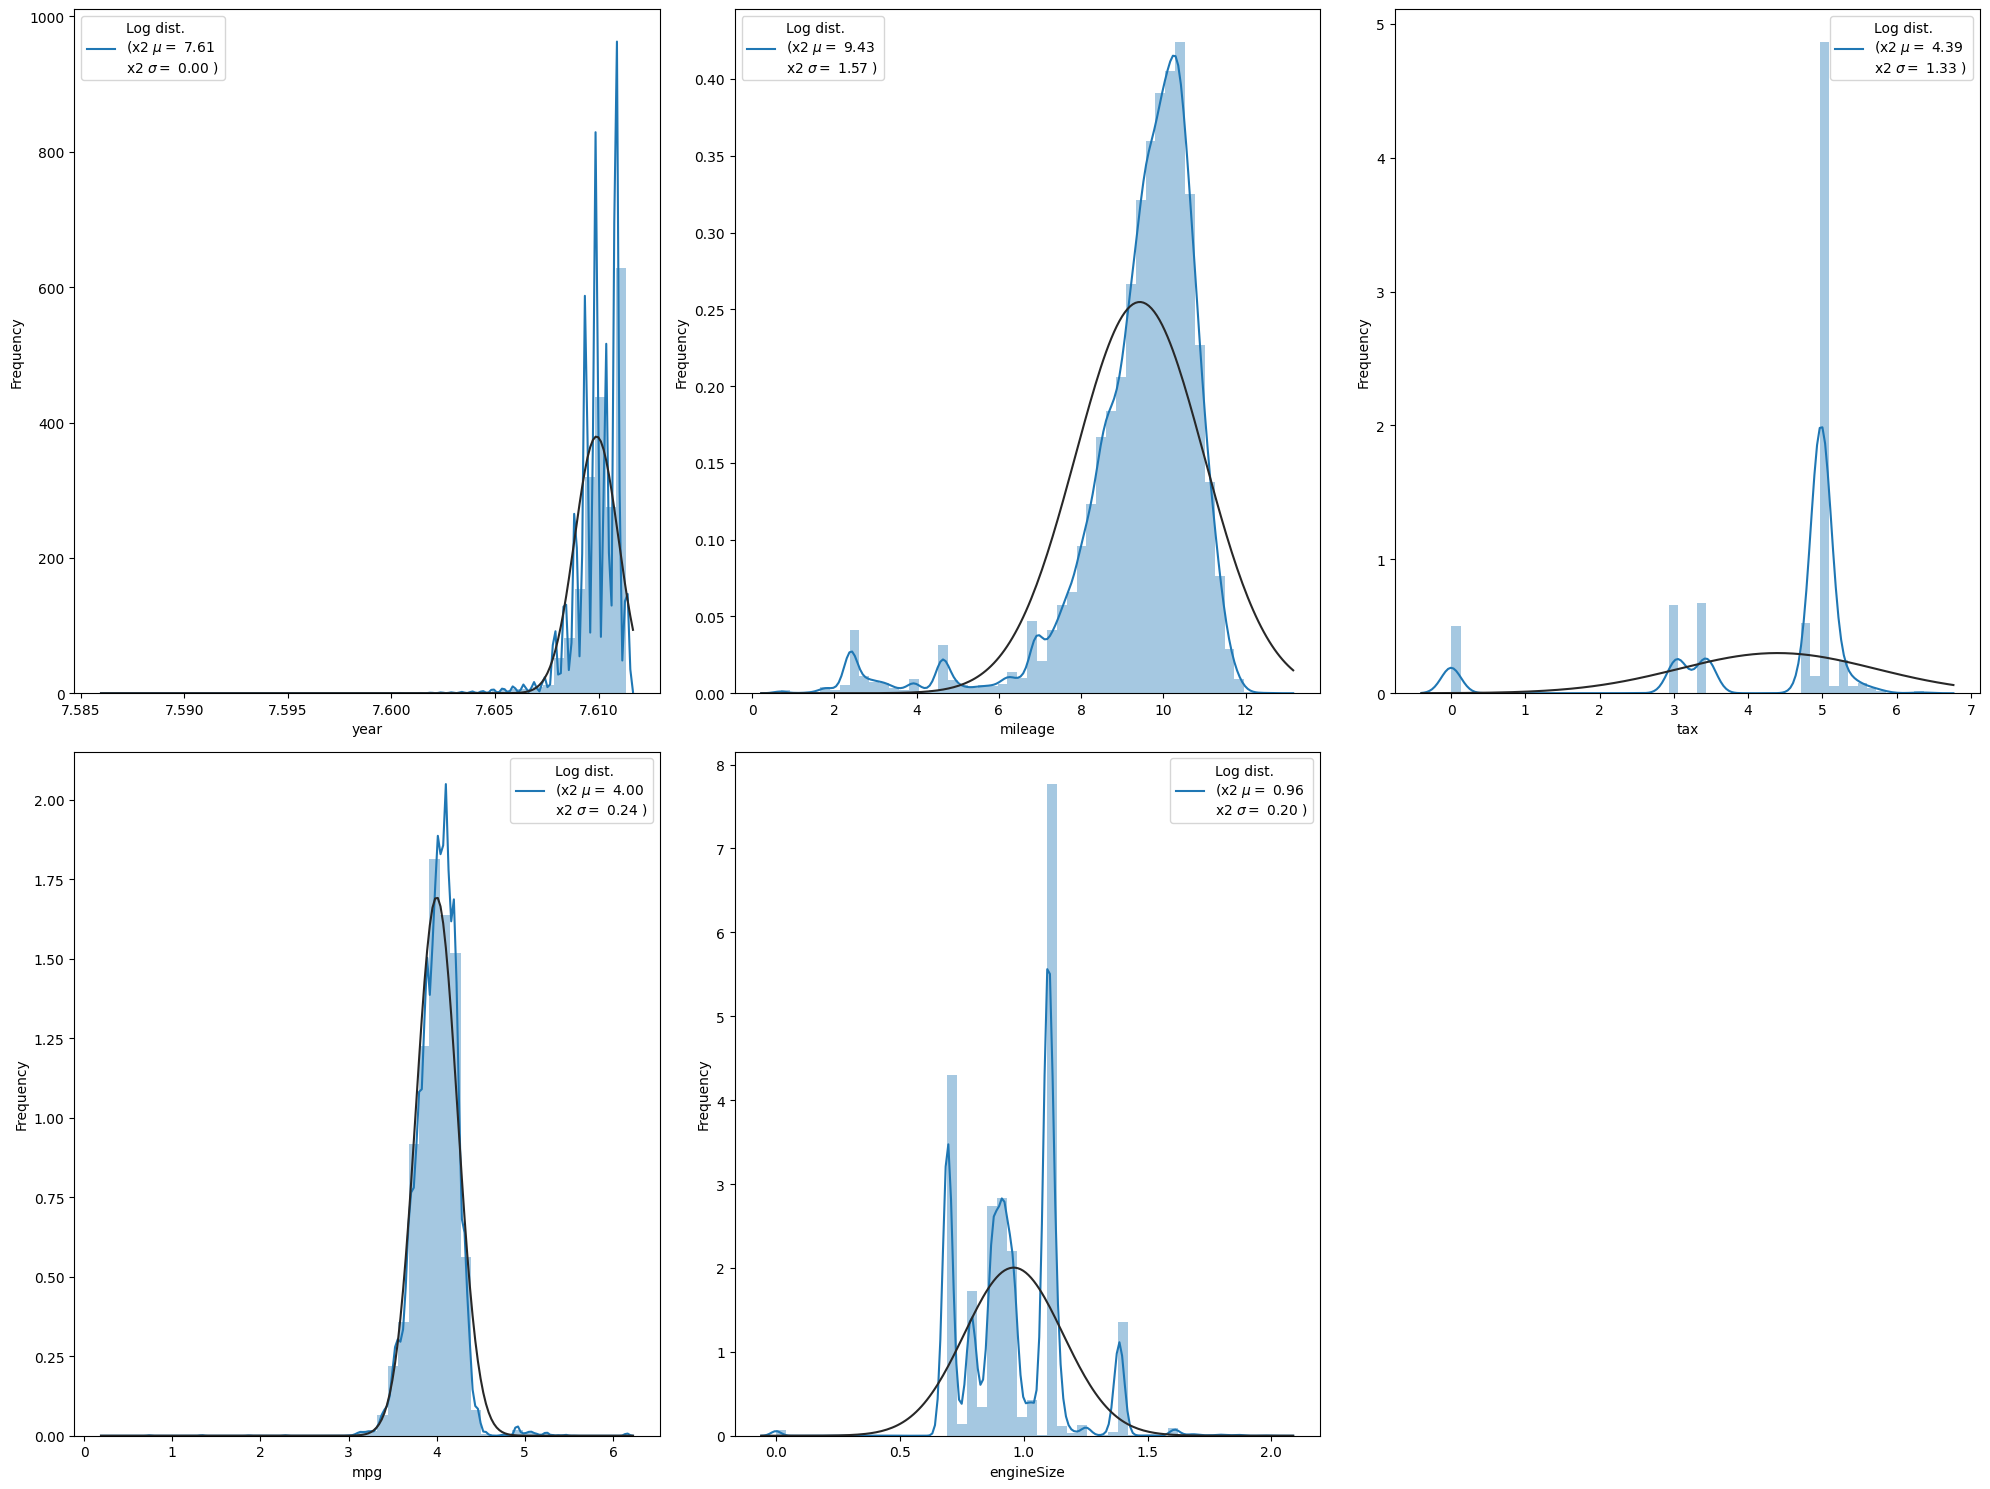

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

figure = plt.figure(figsize=(20,15))
rows, cols = 2, 3
        
for i in range(1, 6): 
    ax = figure.add_subplot(rows, cols, i)
    
    if i <= len(log2_num_df):
        log_column = log2_num_df.columns[i-1]
        x2 = log_num_df[log_column]
            
        sns.distplot(x2, fit=norm)
        (x2_mu, x2_sigma) = norm.fit(x2)
        
        ax.legend([f'Log dist.\n(x2 $\mu=$ {x2_mu:.2f}\nx2 $\sigma=$ {x2_sigma:.2f} )'], loc='best')
        
        plt.xlabel(f'{log_column}')
        plt.ylabel('Frequency')

    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

#### 표준화 스케일링

In [ ]:
# 데이터셋 준비
stand_df = encoding_df.copy(deep=True)

X_stand = stand_df.drop(columns='price')
y_stand = stand_df['price']

xtr_stand, xt_stand, ytr_stand, yt_stand = train_test_split(X_stand, y_stand, test_size=0.3, random_state=42)
print(xtr_stand.shape, xt_stand.shape)
print(ytr_stand.shape, yt_stand.shape)

(69430, 24) (29756, 24)
(69430,) (29756,)


In [ ]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()

num_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

scaler.fit(xtr_stand[num_columns])
xtr_stand[num_columns] = scaler.transform(xtr_stand[num_columns])

xt_stand[num_columns] = scaler.transform(xt_stand[num_columns])

In [ ]:
lgbm_model(xtr_stand, xt_stand, ytr_stand, yt_stand, "Standard")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 16801.196169

LGBM Standard Results

평균 제곱 오차(MSE): 5980771.172
평균 제곱근 오차(RMSE): 2445.562
평균 절대 오차(MAE): 1459.079
평균 절대비율 오차(MAPE): 9.333%
결정 계수(R2): 0.94
정확도: 0.94


In [ ]:
stand_num_df = xtr_stand.loc[:, ['year', 'mileage', 'tax', 'mpg', 'engineSize']]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24412\3734977304.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, fit=norm)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24412\3734977304.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, fit=norm)
C:\Users\Public\

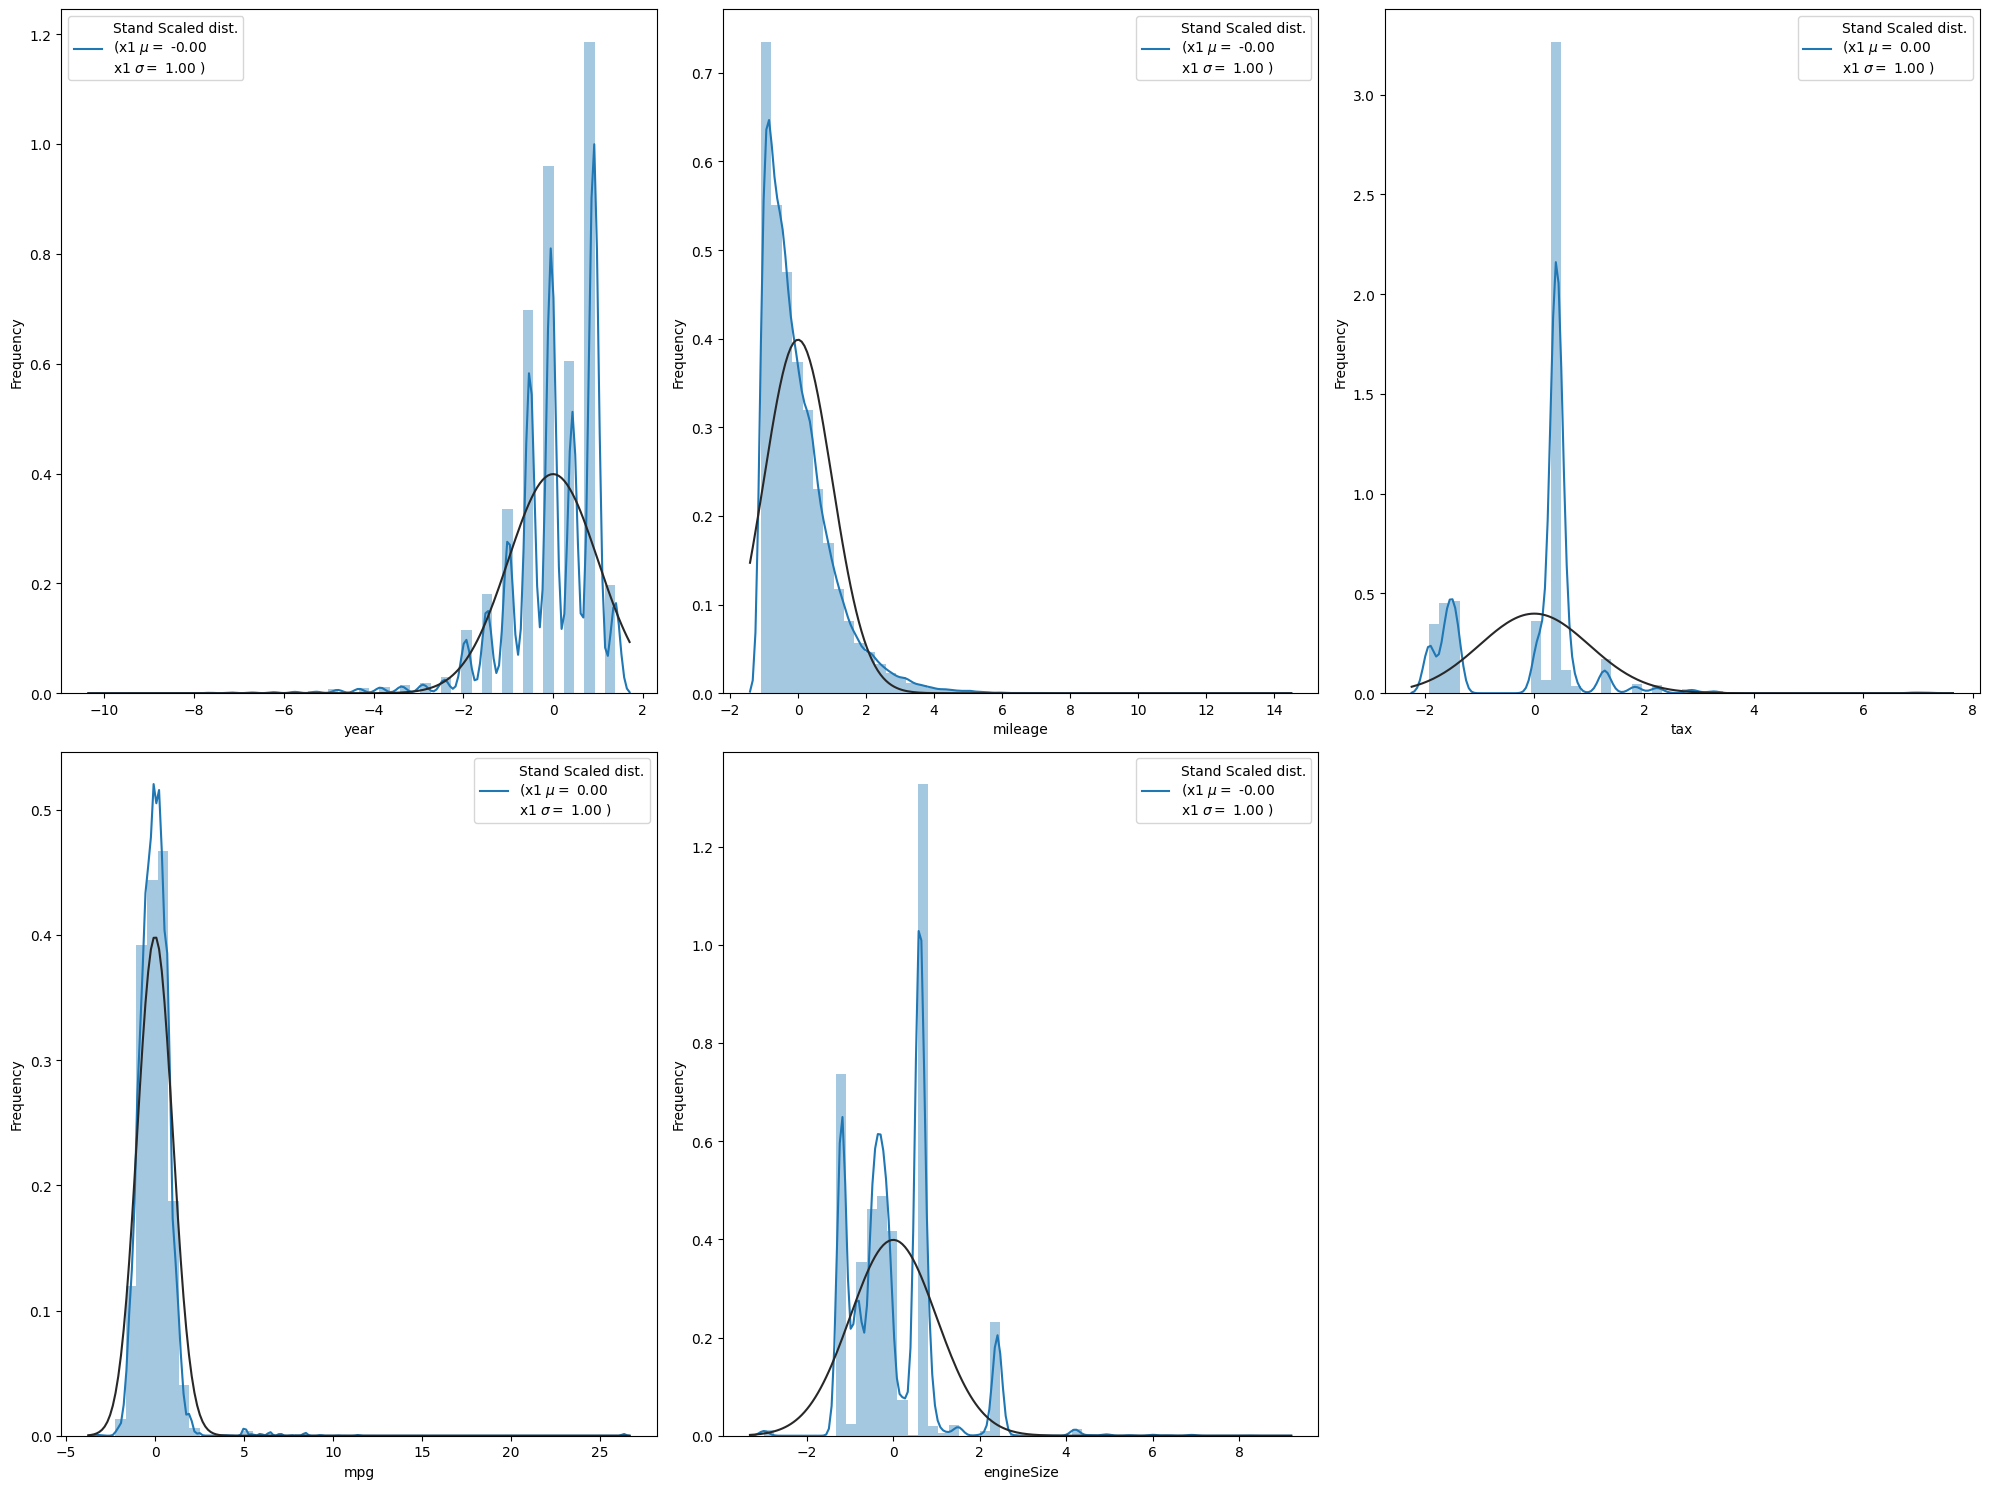

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

figure = plt.figure(figsize=(20,15))
rows, cols = 2, 3

for i in range(1, 6): 
    ax = figure.add_subplot(rows, cols, i)
    
    if i <= len(stand_num_df):
        stand_column = stand_num_df.columns[i-1]
        x1 = stand_num_df[stand_column]
        
        sns.distplot(x1, fit=norm)
        (x1_mu, x1_sigma) = norm.fit(x1)
                
        ax.legend([f'Stand Scaled dist.\n(x1 $\mu=$ {x1_mu:.2f}\nx1 $\sigma=$ {x1_sigma:.2f} )'], loc='best')
        
        plt.xlabel(f'{stand_column}')
        plt.ylabel('Frequency')

    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

#### 정규화 스케일링

In [ ]:
# 데이터셋 준비
minmax_df = encoding_df.copy(deep=True)

X_minmax = minmax_df.drop(columns='price')
y_minmax = minmax_df['price']

xtr_minmax, xt_minmax, ytr_minmax, yt_minmax = train_test_split(X_minmax, y_minmax, test_size=0.3, random_state=42)
print(xtr_minmax.shape, xt_minmax.shape)
print(ytr_minmax.shape, yt_minmax.shape)

(69430, 24) (29756, 24)
(69430,) (29756,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()

num_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

scaler2.fit(xtr_minmax[num_columns])
xtr_minmax[num_columns] = scaler2.transform(xtr_minmax[num_columns])

xt_minmax[num_columns] = scaler2.transform(xt_minmax[num_columns])

In [ ]:
lgbm_model(xtr_minmax, xt_minmax, ytr_minmax, yt_minmax, "Min_Max")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 16801.196169

LGBM Min_Max Results

평균 제곱 오차(MSE): 5884412.541
평균 제곱근 오차(RMSE): 2425.781
평균 절대 오차(MAE): 1453.819
평균 절대비율 오차(MAPE): 9.303%
결정 계수(R2): 0.941
정확도: 0.941


In [ ]:
minmax_num_df = xtr_minmax.loc[:, ['year', 'mileage', 'tax', 'mpg', 'engineSize']]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24412\1964261174.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, fit=norm)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24412\1964261174.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, fit=norm)
C:\Users\Public\

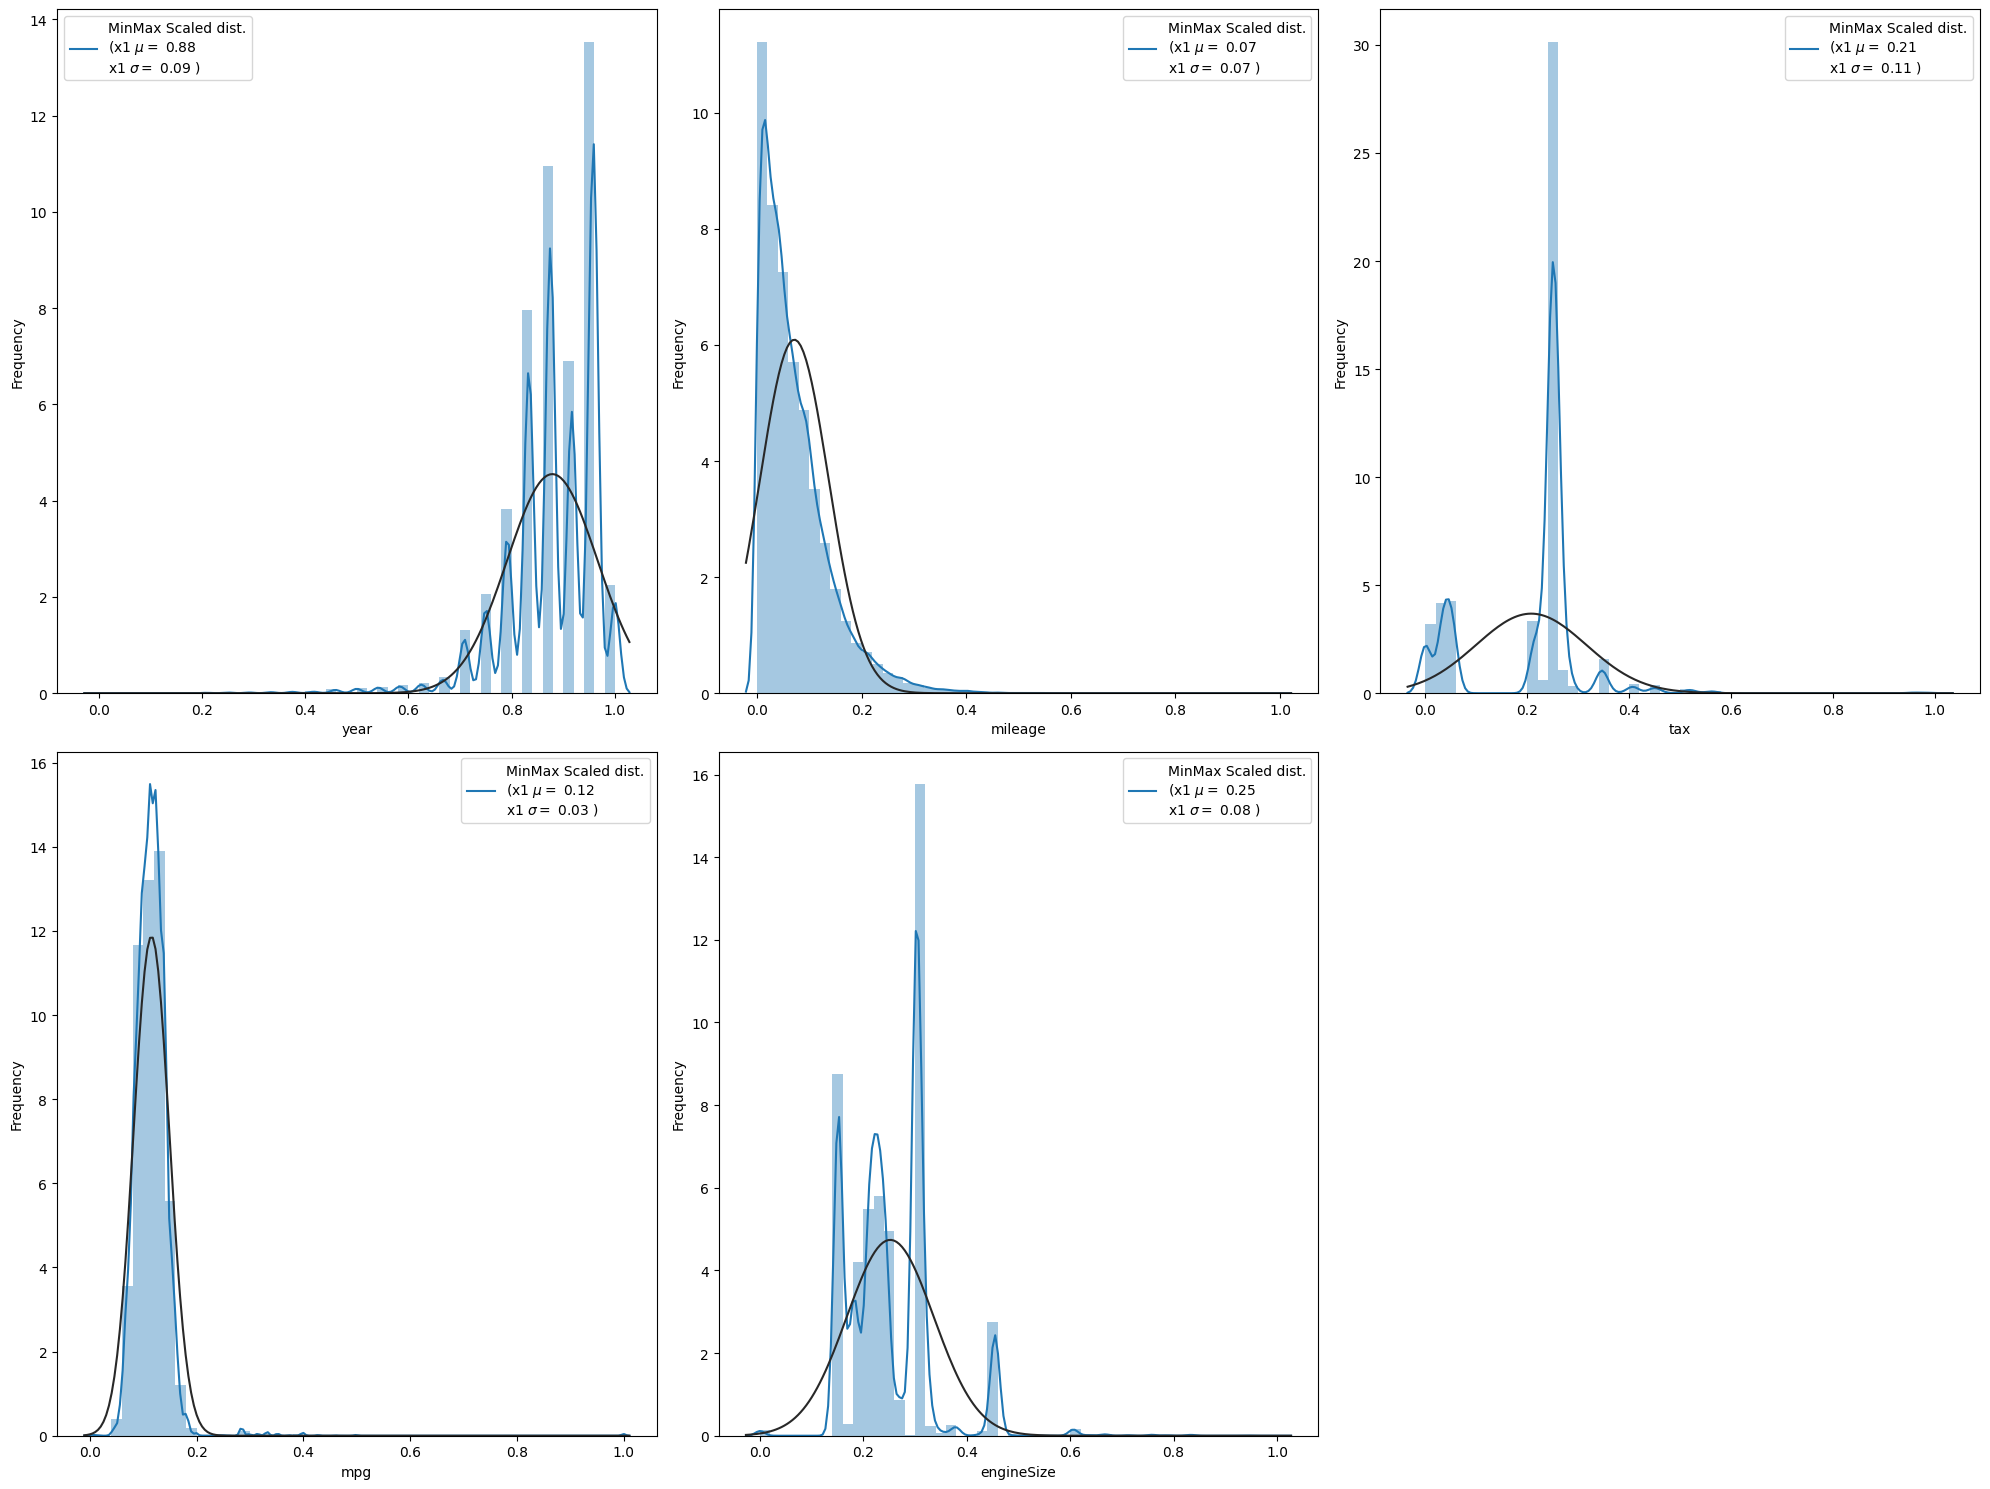

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

figure = plt.figure(figsize=(20,15))
rows, cols = 2, 3

for i in range(1, 6): 
    ax = figure.add_subplot(rows, cols, i)
    
    if i <= len(minmax_num_df):
        minmax_column = minmax_num_df.columns[i-1]
        x1 = minmax_num_df[minmax_column]
        
        sns.distplot(x1, fit=norm)
        (x1_mu, x1_sigma) = norm.fit(x1)
                
        ax.legend([f'MinMax Scaled dist.\n(x1 $\mu=$ {x1_mu:.2f}\nx1 $\sigma=$ {x1_sigma:.2f} )'], loc='best')
        
        plt.xlabel(f'{minmax_column}')
        plt.ylabel('Frequency')

    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

#### 종속변수 로그 변환, 독립변수 표준화

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
def sd_scaling(X_train, X_test, y_train, y_test, normalize_columns):
  #종속변수 로그변환, 독립변수 표준화
  # y값 로그변환
  log_y_train = np.log1p(y_train)
  log_y_test = np.log1p(y_test)
  #독립 변수 표준화(standscaler방법)
  standscaler = StandardScaler()
  #train데이터 스케일링
  sd_X_train = X_train.copy()
  sd_X_test = X_test.copy()
  sd_X_train[normalize_columns] = standscaler.fit_transform(X_train[normalize_columns])
  #test데이터 스케일링
  sd_X_test[normalize_columns] = standscaler.transform(X_test[normalize_columns])
  return sd_X_train, sd_X_test, log_y_train, log_y_test

In [ ]:
# 데이터셋 만들기

log_stand_df = encoding_df.copy(deep=True)

In [ ]:
# 독립 변수 / 종속 변수 분할할
X_logps = log_stand_df.drop(columns='price')
y_logps = log_stand_df['price']

In [ ]:
# train / test 데이터 분할

xtr_logps, xt_logps, ytr_logps, yt_logps = traintest(X_logps, y_logps)

(69430, 24) (29756, 24)
(69430,) (29756,)


In [ ]:
# 데이터 분할하고 사용
normalize_columns = ["year", "mileage", "tax", "mpg"] # 정규화할 변수 리스트
sd_X_train, sd_X_test, log_y_train, log_y_test = sd_scaling(xtr_logps, xt_logps, ytr_logps, yt_logps, normalize_columns)

In [ ]:
lgbm_model_log(sd_X_train, sd_X_test, log_y_train, log_y_test, "Log_Price_Stand")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 9.586980

LGBM Log_Price_Stand Results

평균 제곱 오차(MSE): 7018399.043
평균 제곱근 오차(RMSE): 2649.226
평균 절대 오차(MAE): 1445.447
평균 절대비율 오차(MAPE): 8.611%
결정 계수(R2): 0.951


In [ ]:
results_model(sd_X_train, sd_X_test, log_y_train, log_y_test, "Log_Price_Stand")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 9.586980

LGBM Log_Price_Stand Results

평균 제곱 오차(MSE): 7018399.043
평균 제곱근 오차(RMSE): 2649.226
평균 절대 오차(MAE): 1445.447
평균 절대비율 오차(MAPE): 8.611%
결정 계수(R2): 0.951


#### 종속변수 로그 변환, 독립변수 표준정규화

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
def robust_scaling(X_train, X_test, y_train, y_test, normalize_columns):
  #종속변수 로그변환, 독립변수 표준 정규화
  # y값 로그변환
  log_y_train = np.log1p(y_train)
  log_y_test = np.log1p(y_test)
  #독립 변수 표준 정규화(RobustScaler방법)
  robust_X_train = X_train.copy()
  robust_X_test = X_test.copy()
  robustScaler = RobustScaler()
  #train데이터 스케일링
  robust_X_train[normalize_columns] = robustScaler.fit_transform(X_train[normalize_columns])
  #test데이터 스케일링
  robust_X_test[normalize_columns] = robustScaler.transform(X_test[normalize_columns])
  return robust_X_train, robust_X_test, log_y_train, log_y_test

In [ ]:
# 데이터셋 만들기

log_robust_df = encoding_df.copy(deep=True)

In [ ]:
# 독립 변수 / 종속 변수 분할할
X_logpb = log_robust_df.drop(columns='price')
y_logpb = log_robust_df['price']

In [ ]:
# train / test 데이터 분할

xtr_logpb, xt_logpb, ytr_logpb, yt_logpb = traintest(X_logpb, y_logpb)

(69430, 24) (29756, 24)
(69430,) (29756,)


In [ ]:
normalize_columns = ["year", "mileage", "tax", "mpg"] # 표준 정규화할 변수 리스트
robust_X_train, robust_X_test, log_y_train, log_y_test = robust_scaling(xtr_logpb, xt_logpb, ytr_logpb, yt_logpb, normalize_columns)

In [ ]:
lgbm_model_log(robust_X_train, robust_X_test, log_y_train, log_y_test, "Log_Price_Robust")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 9.586980

LGBM Log_Price_Robust Results

평균 제곱 오차(MSE): 7098253.63
평균 제곱근 오차(RMSE): 2664.255
평균 절대 오차(MAE): 1449.84
평균 절대비율 오차(MAPE): 8.597%
결정 계수(R2): 0.951


In [ ]:
results_model(robust_X_train, robust_X_test, log_y_train, log_y_test, 'Log_Price_Robust')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 9.586980

LGBM Log_Price_Robust Results

평균 제곱 오차(MSE): 7098253.63
평균 제곱근 오차(RMSE): 2664.255
평균 절대 오차(MAE): 1449.84
평균 절대비율 오차(MAPE): 8.597%
결정 계수(R2): 0.951


#### 추가 스케일링 결과 비교

In [ ]:
results_df = pd.DataFrame(results_regression2)
results_df

,LightGBM Base Regression,LightGBM Log_Price Regression,LightGBM Log_Price_Nums Regression,LightGBM Log_Price_All Regression,LightGBM Log_All Regression,LightGBM Standard Regression,LightGBM Min_Max Regression,LightGBM Log_Price_Stand Regression,LightGBM Log_Price_Robust Regression
MSE,5884412.541,6936923.007,6936919.504,6936919.504,5884412.738,5980771.172,5884412.541,7018399.043,7098253.630
RMSE,2425.781,2633.804,2633.803,2633.803,2425.781,2445.562,2425.781,2649.226,2664.255
MAE,1453.819,1448.714,1448.714,1448.714,1453.821,1459.079,1453.819,1445.447,1449.840
MAPE,9.303,8.645,8.645,8.645,9.303,9.333,9.303,8.611,8.597
R2,0.941,0.951,0.951,0.951,0.941,0.940,0.941,0.951,0.951


In [ ]:
results_df2 = pd.DataFrame(results_regression3)
results_df2

,LightGBM Log_Price Regression,LightGBM Log_Price_Nums Regression,LightGBM Log_Price_All Regression,LightGBM Log_Price_Stand Regression,LightGBM Log_Price_Robust Regression
MSE,6936923.007,6936919.504,6936919.504,7018399.043,7098253.630
RMSE,2633.804,2633.803,2633.803,2649.226,2664.255
MAE,1448.714,1448.714,1448.714,1445.447,1449.840
MAPE,8.645,8.645,8.645,8.611,8.597
R2,0.951,0.951,0.951,0.951,0.951


### ***랜덤 포레스트 회귀 모델***

In [66]:
# 베이스라인 모델
from sklearn.ensemble import RandomForestRegressor

rf_base = RandomForestRegressor(random_state=42)
rf_base.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [67]:
# 모델 평가
y_pred_test = rf_base.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score
print('rf_base 평가 지표')
print(f'MAE: {mean_absolute_error(y_test, y_pred_test):.4f}') # 평균 절대 오차
print(f'MSE: {mean_squared_error(y_test, y_pred_test):.4f}') # 평균 제곱 오차
print(f'RMSE: {root_mean_squared_error(y_test, y_pred_test):.4f}') # MSE의 제곱근
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_test) * 100:.2f}') # 실제 값에 비해 차이가 어느 정도인지 퍼센트로 나타냄
print(f'R2_score: {r2_score(y_test, y_pred_test):.4f}') # 실제값의 분산 대비 예측값의 분산


rf_base 평가 지표
MAE: 1143.6719
MSE: 3541286.9685
RMSE: 1881.8307
MAPE: 7.30
R2_score: 0.9625


In [70]:
# 표준화 스케일링 모델
from sklearn.ensemble import RandomForestRegressor

rf_sd_scale = RandomForestRegressor(random_state=42)
rf_sd_scale.fit(sd_X_train, y_train)

RandomForestRegressor(random_state=42)

In [72]:
# 모델 평가
y_pred_test = rf_sd_scale.predict(sd_X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score
print('rf_sd_scale 평가 지표')
print(f'MAE: {mean_absolute_error(y_test, y_pred_test):.4f}') # 평균 절대 오차
print(f'MSE: {mean_squared_error(y_test, y_pred_test):.4f}') # 평균 제곱 오차
print(f'RMSE: {root_mean_squared_error(y_test, y_pred_test):.4f}') # MSE의 제곱근
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_test) * 100:.2f}') # 실제 값에 비해 차이가 어느 정도인지 퍼센트로 나타냄
print(f'R2_score: {r2_score(y_test, y_pred_test):.4f}') # 실제값의 분산 대비 예측값의 분산


rf_sd_scale 평가 지표
MAE: 1144.1596
MSE: 3549890.9178
RMSE: 1884.1154
MAPE: 7.30
R2_score: 0.9624


In [74]:
# 표준화+로그변환 스케일링 모델
from sklearn.ensemble import RandomForestRegressor

rf_sd_log_scale = RandomForestRegressor(random_state=42)
rf_sd_log_scale.fit(sd_X_train, log_y_train)

RandomForestRegressor(random_state=42)

In [82]:
# 모델 평가
y_pred_test = np.expm1(rf_sd_log_scale.predict(sd_X_test))

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score
print('rf_sd_log_scale 평가 지표')
print(f'MAE: {mean_absolute_error(y_test, y_pred_test):.4f}') # 평균 절대 오차
print(f'MSE: {mean_squared_error(y_test, y_pred_test):.4f}') # 평균 제곱 오차
print(f'RMSE: {root_mean_squared_error(y_test, y_pred_test):.4f}') # MSE의 제곱근
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_test) * 100:.2f}') # 실제 값에 비해 차이가 어느 정도인지 퍼센트로 나타냄
print(f'R2_score: {r2_score(y_test, y_pred_test):.4f}') # 실제값의 분산 대비 예측값의 분산


rf_sd_log_scale 평가 지표
MAE: 1139.0667
MSE: 3659459.1217
RMSE: 1912.9713
MAPE: 7.16
R2_score: 0.9612


In [76]:
# 로버스트 스케일링 모델
from sklearn.ensemble import RandomForestRegressor

rf_robust_scale = RandomForestRegressor(random_state=42)
rf_robust_scale.fit(robust_X_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
# 모델 평가
y_pred_test = rf_robust_scale.predict(robust_X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score
print('rf_robust_scale 평가 지표')
print(f'MAE: {mean_absolute_error(y_test, y_pred_test):.4f}') # 평균 절대 오차
print(f'MSE: {mean_squared_error(y_test, y_pred_test):.4f}') # 평균 제곱 오차
print(f'RMSE: {root_mean_squared_error(y_test, y_pred_test):.4f}') # MSE의 제곱근
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_test) * 100:.2f}') # 실제 값에 비해 차이가 어느 정도인지 퍼센트로 나타냄
print(f'R2_score: {r2_score(y_test, y_pred_test):.4f}') # 실제값의 분산 대비 예측값의 분산


rf_robust_scale 평가 지표
MAE: 1144.1254
MSE: 3547933.1287
RMSE: 1883.5958
MAPE: 7.30
R2_score: 0.9624


In [79]:
# 로버스트+로그변환 스케일링 모델
from sklearn.ensemble import RandomForestRegressor

rf_robust_log_scale = RandomForestRegressor(random_state=42)
rf_robust_log_scale.fit(robust_X_train, log_y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 모델 평가: 로버스트+log가 모든 지표에서 가장 좋음
y_pred_test = np.expm1(rf_robust_log_scale.predict(robust_X_test))

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score
print('rf_robust_log_scale 평가 지표')
print(f'MAE: {mean_absolute_error(y_test, y_pred_test):.4f}') # 평균 절대 오차
print(f'MSE: {mean_squared_error(y_test, y_pred_test):.4f}') # 평균 제곱 오차
print(f'RMSE: {root_mean_squared_error(y_test, y_pred_test):.4f}') # MSE의 제곱근
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_test) * 100:.2f}') # 실제 값에 비해 차이가 어느 정도인지 퍼센트로 나타냄
print(f'R2_score: {r2_score(y_test, y_pred_test):.4f}') # 실제값의 분산 대비 예측값의 분산


rf_robust_log_scale 평가 지표
MAE: 1139.1179
MSE: 3658963.1995
RMSE: 1912.8417
MAPE: 7.16
R2_score: 0.9612


## ***6. 하이퍼 파라미터 튜닝***

In [ ]:
# Grid Search CV를 사용하여 하이퍼파라미터 수정
from sklearn.model_selection import GridSearchCV

# 랜덤 포레스트 하이퍼파라미터 설정
rfr_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 5, 9]}

# 랜덤 포레스트 모델 초기화
rfr = RandomForestRegressor(random_state=42)

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝

# Gridsearch의 scoring을 MAPE로 설정
from sklearn.metrics import mean_absolute_percentage_error, make_scorer

# MAPE를 위한 사용자 정의 함수 생성
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

#GridSearchCV 실행

rfr_grid = GridSearchCV(rfr, rfr_params, cv=3, scoring=mape_scorer, n_jobs=-1)
rfr_grid.fit(robust_X_train, log_y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 5, 9],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'))

In [ ]:
# 최적 모델과 예측 결과 계산
best_rfr_model = rfr_grid.best_estimator_
y_pred_rfr = np.expm1(best_rfr_model.predict(robust_X_test))
y_pred_rfr

array([ 9975.91123284, 17725.60632557, 19733.65373162, ...,
       19279.88085201, 12334.30810768, 29046.78860771])

In [ ]:
# 성능 평가 지표 계산
print(f'MAE: {mean_absolute_error(y_test, y_pred_rfr):.4f}') # 평균 절대 오차
print(f'MSE: {mean_squared_error(y_test, y_pred_rfr):.4f}') # 평균 제곱 오차
print(f'RMSE: {root_mean_squared_error(y_test, y_pred_rfr):.4f}') # MSE의 제곱근
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_rfr) * 100:.2f}') # 실제 값에 비해 차이가 어느 정도인지 퍼센트로 나타냄
print(f'R2_score: {r2_score(y_test, y_pred_rfr):.4f}') # 실제값의 분산 대비 예측값의 분산
print(f'Best Params: {rfr_grid.best_params_}')

MAE: 1112.1614
MSE: 3528324.9620
RMSE: 1878.3836
MAPE: 6.96
R2_score: 0.9626
Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# 로버스트+로그변환 스케일링 모델에 best_params 적용하기
from sklearn.ensemble import RandomForestRegressor

rf_robust_log_scale = RandomForestRegressor(random_state=42)
rf_robust_log_scale = rfr_grid.best_estimator_
rf_robust_log_scale.fit(robust_X_train, log_y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [ ]:
# 모델 평가
y_pred_test = np.expm1(rf_robust_log_scale.predict(robust_X_test))

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score
print('rf_robust_log_scale 평가 지표')
print(f'MAE: {mean_absolute_error(y_test, y_pred_test):.4f}') # 평균 절대 오차
print(f'MSE: {mean_squared_error(y_test, y_pred_test):.4f}') # 평균 제곱 오차
print(f'RMSE: {root_mean_squared_error(y_test, y_pred_test):.4f}') # MSE의 제곱근
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_test) * 100:.2f}') # 실제 값에 비해 차이가 어느 정도인지 퍼센트로 나타냄
print(f'R2_score: {r2_score(y_test, y_pred_test):.4f}') # 실제값의 분산 대비 예측값의 분산


rf_robust_log_scale 평가 지표
MAE: 1112.1614
MSE: 3528324.9620
RMSE: 1878.3836
MAPE: 6.96
R2_score: 0.9626


## ***7. 최종 성능 측정과 평가***

## ***8. 결과 해석***

## ***9. 모델 저장 및 로딩***